# Initialization

### Import packages

In [ ]:
pip install lmfit

In [3]:
import matplotlib.pyplot as plt
import lmfit
from lmfit.models import Model
import numpy as np
from uncertainties import ufloat as uf
import os

### Define some useful functions

In [3]:
def eff_fitfunction(x, a0, a1, a2, a3, a4):
    return np.exp(a0 + a1*np.log(x) + a2*(np.log(x))**2 + a3*(np.log(x))**3 + a4*(np.log(x))**4)


def eff_point(fitresult, E):
    return fitresult.eval(x=E)


def eff_errpoint(fitresult, mean_sys, lower_sys, upper_sys, x_cont, E):
    meanval = np.interp(E, x_cont, mean_sys)
    lower = np.interp(E, x_cont, lower_sys) - meanval
    upper = np.interp(E, x_cont, upper_sys) - meanval
    return [meanval, lower, upper]

### Load the datapoints and uncertainties

In [4]:
# Set the number of samples for the systematic error and the number of points for the linspace
N_randoms = 500
N_points = 500

# import the input for efficiency fits in 2d arrays: dimension 1 = source, dimension 2 = datapoint or error
#arr_eff = np.array([[1.31*10**(-4)*28.58/(28.58+0.016)          ,2.53*10**(-4)*7.583/(7.583+0.0046+0.072)                         ,1.52*10**(-4)*26.5/(26.5+0.036+0.0093)                        ,2.83*10**(-5),2.01*10**(-5)*14.605/(14.605+0.135+0.0037)                    ,1.07*10**(-5)],[3.65*10**(-5)]], dtype = 'object')
arr_eff = np.array([[1.566*10**(-4)*28.58/(28.58+0.016)          ,2.702*10**(-4)*7.583/(7.583+0.0046+0.072)                         ,1.556*10**(-4)*26.5/(26.5+0.036+0.0093)                        ,4.077*10**(-5),2.902*10**(-5)*14.605/(14.605+0.135+0.0037)                    ,1.174*10**(-5)],[3.864*10**(-5)],[1.938*10**(-4),1.694*10**(-4),1.274*10**(-4),1.07*10**(-4)],[1.761*10**(-5),1.332*10**(-5)]], dtype = 'object')
#arr_E = np.array([[(121.7817*28.58 + 125.69*0.016)/(28.58+0.016),(244.6975*7.583+239.42*0.0046+251.630*0.072)/(7.583+0.0046+0.072),(344.2785*26.5+340.40*0.036+351.66*0.0093)/(26.5+0.036+0.0093),778.9040     ,(964.079*14.605+963.39*0.135+968*0.0037)/(14.605+0.135+0.0037),1408.006],[661.657]], dtype = 'object')
arr_E = np.array([[(121.7817*28.58 + 125.69*0.016)/(28.58+0.016),(244.6975*7.583+239.42*0.0046+251.630*0.072)/(7.583+0.0046+0.072),(344.2785*26.5+340.40*0.036+351.66*0.0093)/(26.5+0.036+0.0093),778.9040     ,(964.079*14.605+963.39*0.135+968*0.0037)/(14.605+0.135+0.0037),1408.006],[661.657],[276.39,302.85,356.01,383.84],[1173.49,1333.22]], dtype = 'object')
arr_xerr = np.array([[0.0003,0.0008,0.0012,0.0018,0.018,0.003],[0.003]], dtype = 'object') #very small: not taking into account for the weights
#arr_yerr = np.array([[0.01*10**(-4),0.02*10**(-4),0.01*10**(-4),0.05*10**(-5),0.03*10**(-5),0.02*10**(-5)],[0.0210*10**(-5)]], dtype = 'object')
arr_yerr = np.array([[0.062*10**(-4),0.073*10**(-4),0.037*10**(-4),0.088*10**(-5),0.134*10**(-5),0.023*10**(-5)],[0.199*10**(-5)],[0.105*10**(-4),0.091*10**(-4),0.067*10**(-4),0.056*10**(-4)],[0.057*10**(-5),0.043*10**(-5)]], dtype = 'object')

# Diffent relative uncertainties, and plot labels/colors
source_relers = [0.017,0.05,0.05,0.03]
source_names = np.array(["Eu152", "Cs137", "Ba133", "Co60"])
source_colors = np.array(['r', 'g', 'c','m','k'])

### Flatten the arrays

In [5]:
vec_E = np.array([])
vec_xerr = np.array([])
vec_yerr = np.array([])
vec_eff_stat = np.array([])
lower_sys = np.zeros(N_points)
upper_sys = np.zeros(N_points)
mean_sys = np.zeros(N_points)

for i in range(len(arr_E)):                                 # Assign the unchanged values and uncertainties
    vec_E = np.append(vec_E, arr_E[i])
    #vec_xerr = np.append(vec_xerr, arr_xerr[i])
    vec_yerr = np.append(vec_yerr, arr_yerr[i])
    vec_eff_stat = np.append(vec_eff_stat, arr_eff[i])
    
x_cont = np.linspace(10**-5, max(vec_E), N_points)
model = Model(eff_fitfunction)

### Flatten the arrays (1 Source)

# Statistical analysis

[[Model]]
    Model(eff_fitfunction)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 103
    # data points      = 13
    # variables        = 5
    chi-square         = 59.7078884
    reduced chi-square = 7.46348606
    Akaike info crit   = 29.8186923
    Bayesian info crit = 32.6434390
    R-squared          = -7.1844e+08
[[Variables]]
    a0: -933.370826 +/- 222.386898 (23.83%) (init = -1)
    a1:  604.697531 +/- 149.321369 (24.69%) (init = 0.01)
    a2: -147.060577 +/- 37.3072088 (25.37%) (init = 0)
    a3:  15.7955734 +/- 4.11200597 (26.03%) (init = 0)
    a4: -0.63396702 +/- 0.16875574 (26.62%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a3, a4) = -1.000
    C(a2, a3) = -1.000
    C(a1, a2) = -1.000
    C(a0, a1) = -1.000
    C(a2, a4) = 0.999
    C(a1, a3) = 0.999
    C(a0, a2) = 0.999
    C(a1, a4) = -0.999
    C(a0, a3) = -0.999
    C(a0, a4) = 0.998
inf


C:\Users\r0750853\Anaconda3\lib\site-packages\lmfit\model.py:1563: RuntimeWarning: overflow encountered in multiply
  df2[key] += fjac[key][i] * fjac[key][j] * covar[i, j]
C:\Users\r0750853\Anaconda3\lib\site-packages\lmfit\model.py:1563: RuntimeWarning: invalid value encountered in add
  df2[key] += fjac[key][i] * fjac[key][j] * covar[i, j]


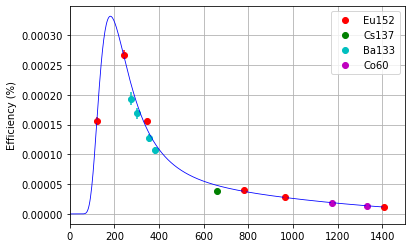

In [6]:
pars = model.make_params(a0=-1, a1=0.01, a2=0, a3=0, a4=0)
fitresult_stat = model.fit(vec_eff_stat, x=vec_E, params=pars, weights=1/vec_yerr)
print(fitresult_stat.fit_report())

fitvalue_stat = fitresult_stat.eval(x=x_cont)
uncertainty_stat = fitresult_stat.eval_uncertainty(x=x_cont)
print(max(uncertainty_stat))

for index, value in enumerate(arr_eff):
    plt.plot(arr_E[index], value, 'o', color=source_colors[index], label=source_names[index])
    #plt.errorbar(arr_E[index], value, xerr=arr_xerr[index], yerr=arr_yerr[index], fmt='.', color=source_colors[index])
    plt.errorbar(arr_E[index], value, yerr=arr_yerr[index], fmt='.', color=source_colors[index])

plt.plot(x_cont, fitvalue_stat, 'b', linewidth=0.8)
#plt.plot(x_cont, fitvalue_stat - uncertainty_stat, color='r', linewidth=0.8)
#plt.plot(x_cont, fitvalue_stat + uncertainty_stat, color='r', linewidth=0.8)
#plt.fill_between(x_cont, fitvalue_stat - uncertainty_stat, fitvalue_stat + uncertainty_stat, color='grey')
plt.xlim([0, 1500])
plt.ylabel("Efficiency (%)")
plt.legend(loc ='best')
plt.grid()
plt.show()

# Systematics analysis

### Pick activity from distribution and perform fit $N_{random}$ times

In [7]:
fit_values = np.ones([N_randoms, N_points])

for i in range(N_randoms):
    vec_eff = np.array([])
    
    for index_1, isotope in enumerate(arr_eff):
        source_spread = np.random.normal(1, source_relers[index_1])
        for index_2, value in enumerate(isotope):
            vec_eff = np.append(vec_eff, value/source_spread)

    pars = model.make_params(a0=1, a1=10**-2, a2=10**-2, a3=10**-2, a4 = 10**-2)
    fitresult = model.fit(vec_eff, x=vec_E, params=pars, weights=1/vec_yerr)
    fit_values[i] = fitresult.eval(x=x_cont)

### Find the [-1 $\sigma$, +1 $\sigma$] intervals for all x values

In [8]:
distribution = fit_values.T                                 # Get a list with all the values of the fit in x

# sort list --> 15.87% and 84.13% are +-1sigma

for i in range(N_points):                                   # Order the list to obtain +1 and -1 sigma values (15.87%; 84.13%)
    distr_inpoint = np.sort(distribution[i])
    lower_sys[i] = distr_inpoint[round(N_randoms * 0.1587)]
    upper_sys[i] = distr_inpoint[round(N_randoms * 0.8413)]
    mean_sys[i] = distr_inpoint[round(N_randoms*0.5)]
    

# Plot the results

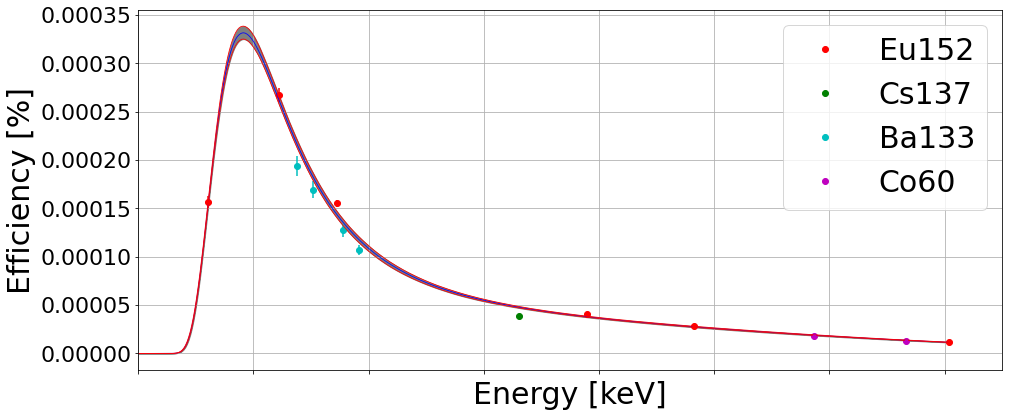

In [9]:
plt.rcParams["figure.figsize"] = (15, 5)

# Plot the fit and residues in a single figure
fig = plt.figure(1)
frame1 = fig.add_axes((.1,.2+.4,.8,.6 +.4))
frame1.set_xticklabels([])

# Plot the data points. Each isotope can get a different color
for index, value in enumerate(arr_eff):
    frame1.plot(arr_E[index], value, 'o', color=source_colors[index], label=source_names[index])
    #frame1.errorbar(arr_E[index], value, xerr=arr_xerr[index], yerr=arr_yerr[index], fmt='.', color=source_colors[index])
    frame1.errorbar(arr_E[index], value, yerr=arr_yerr[index], fmt='.', color=source_colors[index])

    
fit = fitresult_stat.eval(x=x_cont)

frame1.plot(x_cont, mean_sys, color='b', linewidth=0.8)
frame1.plot(x_cont, lower_sys, color='r', linewidth=0.8)
frame1.plot(x_cont, upper_sys, color='r', linewidth=0.8)
frame1.fill_between(x_cont, lower_sys, upper_sys, color='grey')
frame1.set_xlim([0, 1500])
frame1.tick_params(axis='y', which='major', labelsize=22)
frame1.set_ylabel("Efficiency [%]", size = 30)
frame1.legend(loc ='best', fontsize = 30)
frame1.grid()
frame1.set_xlabel('Energy [keV]', size = 30)

os.chdir("C:/Users/r0750853/Documents/aa figures")
plt.savefig('efficiency_overview.pdf')
plt.show()
plt.rcParams["figure.figsize"] = (6.4, 4.8)

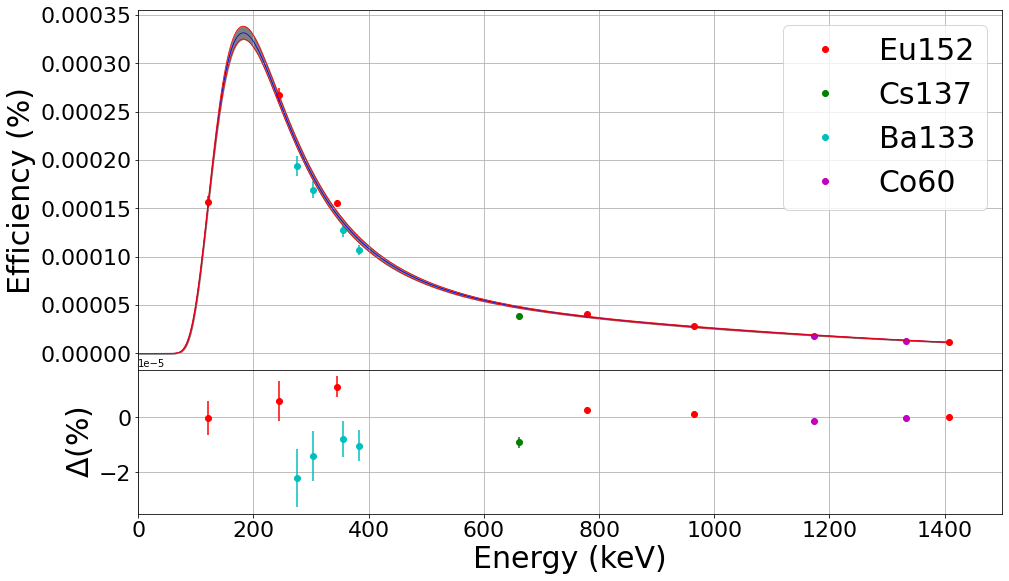

In [10]:
plt.rcParams["figure.figsize"] = (15, 5)

# Plot the fit and residues in a single figure
fig = plt.figure(1)
frame1 = fig.add_axes((.1,.2+.4,.8,.6 +.4))
frame1.set_xticklabels([])

# Plot the data points. Each isotope can get a different color
for index, value in enumerate(arr_eff):
    frame1.plot(arr_E[index], value, 'o', color=source_colors[index], label=source_names[index])
    #frame1.errorbar(arr_E[index], value, xerr=arr_xerr[index], yerr=arr_yerr[index], fmt='.', color=source_colors[index])
    frame1.errorbar(arr_E[index], value, yerr=arr_yerr[index], fmt='.', color=source_colors[index])

    
fit = fitresult_stat.eval(x=x_cont)

frame1.plot(x_cont, mean_sys, color='b', linewidth=0.8)
frame1.plot(x_cont, lower_sys, color='r', linewidth=0.8)
frame1.plot(x_cont, upper_sys, color='r', linewidth=0.8)
frame1.fill_between(x_cont, lower_sys, upper_sys, color='grey')
frame1.set_xlim([0, 1500])
frame1.tick_params(axis='y', which='major', labelsize=22)
frame1.set_ylabel("Efficiency (%)", size = 30)
frame1.legend(loc ='best', fontsize = 30)
frame1.grid()


frame2=fig.add_axes((.1,.2,.8,.4)) 
diff = vec_eff_stat - fitresult_stat.eval(x=vec_E)
reldiff = 100 * diff/vec_eff_stat
pos = 0

for index, value in enumerate(arr_eff):
    size = len(value)
    frame2.plot(arr_E[index], diff[pos:pos+size], 'o', color=source_colors[index])
    #frame2.errorbar(arr_E[index], diff[pos:pos+size], xerr=arr_xerr[index], yerr=arr_yerr[index], fmt='.', color=source_colors[index])
    frame2.errorbar(arr_E[index], diff[pos:pos+size], yerr=arr_yerr[index], fmt='.', color=source_colors[index])
    pos += size

frame2.set_xlabel("Energy (keV)", size = 30)
frame2.set_ylabel("$\Delta$(%)", size = 30)
frame2.set_xlim([0, 1500])
frame2.tick_params(axis='both', which='major', labelsize=22)
frame2.grid()

os.chdir("C:/Users/r0750853/Documents/aa figures")
plt.savefig('efficiency_overview.pdf', bbox_inches='tight')
plt.show()
plt.rcParams["figure.figsize"] = (6.4, 4.8)

In [11]:
E_point = 200

print(eff_point(fitresult_stat, E_point))
print(eff_errpoint(fitresult_stat, mean_sys, lower_sys, upper_sys, x_cont, E_point))

0.000323131104768324
[0.0003225693604810756, -5.842348999817858e-06, 6.335705443714999e-06]


In [12]:
#calculation of the systematical error:
energies = np.array([105.305,148.65,180.103,262.322,340.690,367.225])
errup,errdown = eff_errpoint(fitresult_stat, mean_sys, lower_sys, upper_sys, x_cont, energies)[1:3]
systerrorsup = errup/eff_errpoint(fitresult_stat, mean_sys, lower_sys, upper_sys, x_cont, energies)[0]
systerrorsdown = errdown/eff_errpoint(fitresult_stat, mean_sys, lower_sys, upper_sys, x_cont, energies)[0]
systematic_error = np.array([np.mean(systerrorsdown), np.mean(systerrorsup)])
print('Relative systematical error (down) '+str(systematic_error[0]))
print('Relative systematical error (up) '+str(systematic_error[1]))
print(systerrorsdown)
print(systerrorsup)

Relative systematical error (down) 0.02324873673459293
Relative systematical error (up) -0.02319644183607289
[0.03258224 0.02063589 0.02093738 0.01839117 0.02307928 0.02386645]
[-0.03634229 -0.01870051 -0.01949363 -0.01630309 -0.02285267 -0.02548646]


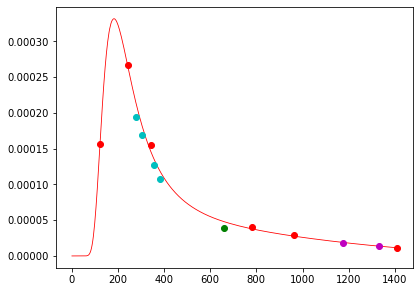

In [13]:
plt.plot(x_cont, mean_sys, color='r', linewidth=0.8)
for index, value in enumerate(arr_eff):
    plt.plot(arr_E[index], value, 'o', color=source_colors[index], label=source_names[index])

# Functions to calculate the activity

In [15]:
import os
from pybaselines import Baseline, utils
import lmfit

In [280]:
#function to transform from an energy to the corresponding channelnumber
def energytochannel(energy):
    return int((energy+0.99)/0.751)

def linearmod(x, intercept, slope):
    return intercept + x*slope

def gausmod(x, amp, mu, sigma):
    return (np.absolute(amp)/(np.sqrt(2*np.pi)*sigma)) * np.exp(-0.5 * ((x - mu)/sigma)**2)

#function to calculate the activity that corresponds to a single peak in the spectrum
def CalculatePeak(spectrum, livetime, inputDict, plot=False, print_check=False): 
    # spectrum corresponds to the number of counts per channelnumber, livetime to the corresponding livetime with which the spectrum was made
    # inputDict contains the information specific to the peak that we want to know the corresponding activity of
    # plot indicates whether the plots should be generated
    
    #extract the information from the dictionary
    energy_peak = inputDict['energy_peak'] # central energy of the peak
    intensity_peak = inputDict['intensity_peak'] # tabulated intensity of the peak
    bg_start = inputDict['bg_range'][0] # start of the range in which we want to determine the background with the snip algorithm
    bg_stop = inputDict['bg_range'][1] # end of the range in which we want to determine the background with the snip algorithm
    fit_start = inputDict['fit_range'][0] # start of the range where the fit should start (defined with respect to the background range)
    fit_stop = inputDict['fit_range'][1] # end of the range where the fit should start (defined with respect to the background range)
    sigma_guess = inputDict['sigma_guess'] # first guess for the standarddeviation of the peak
    number_of_peaks = inputDict['number_of_peaks'] # how many peaks should be fitted together
    
    chan = np.arange(0, 4096)
    energies = chan*0.751 - 0.99
    # Estimation for the background
    x_bg = chan[energytochannel(bg_start):energytochannel(bg_stop)]
    y_bg = spectrum[energytochannel(bg_start):energytochannel(bg_stop)]
    baseline_fitter = Baseline(x_data=x_bg)
    bg = baseline_fitter.snip(y_bg, max_half_window=20, decreasing=True)[0]
    if plot==True:
        plt.figure(figsize = (20,5))
        plt.plot(chan, spectrum)
        plt.xlim(0,800)
        plt.plot(x_bg,bg)
    # determine the fit range
    x_tofit = x_bg[fit_start:fit_stop]
    y_tofit = y_bg[fit_start:fit_stop] - bg[fit_start:fit_stop]
    # make the models
    if number_of_peaks == 1:
        gmod = Model(gausmod) + Model(linearmod)
    elif number_of_peaks == 2:
        gmod = Model(gausmod,prefix = 'p1_') + Model(gausmod,prefix = 'p2_') + Model(linearmod)
    elif number_of_peaks ==3:
        gmod = Model(gausmod,prefix = 'p1_') + Model(gausmod,prefix = 'p2_') + Model(gausmod,prefix = 'p3_') + Model(linearmod)
    else:
        print("This program cannot fit more than 3 peaks at once")
    
    amp_guess = np.max(y_tofit) * np.sqrt(2*np.pi) * sigma_guess
    # initialize the parameters of the fit
    if number_of_peaks == 1:
        mu_guess = energytochannel(energy_peak)
        params = gmod.make_params(amp = amp_guess, mu = mu_guess, sigma = sigma_guess, intercept = 0, slope = 0)
    elif number_of_peaks == 2:
        mu_guess = [energytochannel(energy_peak[0]),energytochannel(energy_peak[1])]
        params = gmod.make_params(p1_amp = amp_guess, p1_mu = mu_guess[0], p1_sigma = sigma_guess, p2_amp = amp_guess, p2_mu = mu_guess[1], p2_sigma = sigma_guess, intercept = 0, slope = 0)
    elif number_of_peaks == 3:
        mu_guess = [energytochannel(energy_peak[0]),energytochannel(energy_peak[1]),energytochannel(energy_peak[2])]
        params = gmod.make_params(p1_amp = amp_guess, p1_mu = mu_guess[0], p1_sigma = sigma_guess, p2_amp = amp_guess, p2_mu = mu_guess[1], p2_sigma = sigma_guess, p3_amp = amp_guess, p3_mu = mu_guess[2], p3_sigma = sigma_guess, intercept = 0, slope = 0)
    
    # determine the error for the weights that should be taken into account
    stat_err = np.sqrt(y_bg[fit_start:fit_stop])
    for index, value in enumerate(stat_err):
        if value == 0:
            stat_err[index] = 1
            
    result_fit = gmod.fit(y_tofit, params, x = x_tofit, weights = 1/stat_err)
    if plot == 1:
        plt.plot(x_bg, y_bg)
        plt.plot(x_tofit, result_fit.eval(x=x_tofit) + bg[fit_start:fit_stop], 'r--')
        plt.plot(np.linspace(100,200),-7.55430711610487*np.linspace(100,200) + 2346.89700374532)
        if number_of_peaks == 1:
            plt.plot(x_tofit,bg[fit_start:fit_stop] + gausmod(x_tofit, result_fit.params['amp'].value, result_fit.params['mu'].value, result_fit.params['sigma'].value) + linearmod(x_tofit, result_fit.params['intercept'].value,result_fit.params['slope'].value ),'k' )
        else:        
            plt.plot(x_tofit,bg[fit_start:fit_stop] + gausmod(x_tofit, result_fit.params['p1_amp'].value, result_fit.params['p1_mu'].value, result_fit.params['p1_sigma'].value) + linearmod(x_tofit, result_fit.params['intercept'].value,result_fit.params['slope'].value ),'k' )
    # Calculate the activity
    if print_check == True:
        print('number of counts in the peak')
        print(result_fit.params['amp'])
    if number_of_peaks == 1:
        if isinstance(result_fit.params['amp'].stderr, float):
            if (result_fit.params['amp'].stderr/result_fit.params['amp'].value < 0.5): # if the fit is weak, the activity should be assigned to 0
                Counts = uf(result_fit.params['amp'].value, result_fit.params['amp'].stderr)
                eff = eff_errpoint(fitresult_stat, mean_sys, lower_sys, upper_sys, x_cont, energy_peak)[0]
                activ_uf = np.abs(Counts / (intensity_peak*livetime*eff))
                activ = activ_uf.n
                stdev = activ_uf.s
            else:
                print('was not able to fit - 1')
                activ = 0
                stdev = 0
        else:
            print('was not able to fit - 2')
            activ = 0
            stdev = 0
    else:
        peaks_to_return = inputDict['155_peak_numbers']
        activ  = []
        stdev = []
        for ii in peaks_to_return:
            amp_step = 'p' + str(ii+1)+'_amp'
            param_amp_step = result_fit.params[amp_step]
            if isinstance(param_amp_step.stderr, float):
                if (param_amp_step.stderr/param_amp_step.value < 0.5):
                    Counts = uf(param_amp_step.value, param_amp_step.stderr)
                    eff = eff_errpoint(fitresult_stat, mean_sys, lower_sys, upper_sys, x_cont, energy_peak[ii])[0]
                    activ_uf = np.abs(Counts / (intensity_peak[ii]*livetime*eff))
                    activ.append(activ_uf.n)
                    stdev.append(activ_uf.s)
                else:
                    print('was not able to fit - 3')
                    activ.append(0)
                    stdev.append(0)
            else:
                print('was not able to fit - 4')
                activ.append(0)
                stdev.append(0)
    return activ, stdev

In [213]:
def Calculate_peak1_156(spectrum, livetime, plot=False):
    inputDict = {
        "energy_peak" : 199.2132,
        "intensity_peak" : 0.409,
        "bg_range" : [0, 400],
        "fit_range" : [260, 290],
        "sigma_guess" : 7,
        "number_of_peaks" : 1
    }
    activ, stdev = CalculatePeak(spectrum, livetime, inputDict, plot=plot)
    return activ, stdev


def Calculate_peak1_155(spectrum, livetime, plot=False):
    inputDict = {
        "energy_peak" : [90, 105.305],
        "intensity_peak" : [1,0.25],
        "bg_range" : [29,179],
        "fit_range" : [70,130],
        "sigma_guess" : 7,
        "number_of_peaks" : 2,
        "155_peak_numbers" : [1]
    }
    activ, stdev = CalculatePeak(spectrum, livetime, inputDict, plot=plot)
    return activ, stdev

def Calculate_peak1_155(spectrum, livetime, plot=False, print_check= False):
    inputDict = {
        "energy_peak" : 105.31,
        "intensity_peak" : 0.25,
        "bg_range" : [29,179],
        "fit_range" : [85,130],
        "sigma_guess" : 7,
        "number_of_peaks" : 1,
    }
    activ, stdev = CalculatePeak(spectrum, livetime, inputDict, plot=plot,print_check=print_check)
    return activ, stdev


def Calculate_peak2_3_155(spectrum, livetime, plot=False):
    inputDict = {
        "energy_peak" : [148.65, 165.864, 180.103],
        "intensity_peak" : [0.02648,0,0.0745],
        "bg_range" : [40,500],
        "fit_range" : [130,200],
        "sigma_guess" : 7,
        "number_of_peaks" : 3,
        "155_peak_numbers" : [0,2]
    }
    activ, stdev = CalculatePeak(spectrum, livetime, inputDict, plot=plot)
    return activ, stdev

def Calculate_peak4_155(spectrum, livetime, plot=False):
    inputDict = {
        "energy_peak" : 262.322,
        "intensity_peak" : 0.0529,
        "bg_range" : [200,500],
        "fit_range" : [60,110],
        "sigma_guess" : 7,
        "number_of_peaks" : 1
    }
    activ, stdev = CalculatePeak(spectrum, livetime, inputDict, plot=plot)
    return activ, stdev

def Calculate_peak5_6_155(spectrum, livetime, plot=False):
    inputDict = {
        "energy_peak" : [340.690, (367.225*0.0148+367.638*0.0078+367.929*0.0005+ 370.721*0.00228)/(0.0148 + 0.0078 + 0.0005 + 0.00228)],
        "intensity_peak" : [0.01182,0.0148 + 0.0078 + 0.0005 + 0.00228],
        "bg_range" : [300,550],
        "fit_range" : [40,120],
        "sigma_guess" : 4.5,
        "number_of_peaks" : 2,
        "155_peak_numbers" : [0,1]
    }
    activ, stdev = CalculatePeak(spectrum, livetime, inputDict, plot=plot)
    return activ, stdev

def Calculate_Ce(spectrum, livetime, plot=False):
    inputDict = {
        "energy_peak" : [148.65, 165.864, 180.103],
        "intensity_peak" : [0,0.8,0],
        "bg_range" : [40,500],
        "fit_range" : [130,200],
        "sigma_guess" : 7,
        "number_of_peaks" : 3,
        "155_peak_numbers" : [1]
    }
    activ, stdev = CalculatePeak(spectrum, livetime, inputDict, plot=plot)
    return activ, stdev

In [111]:
def redchi(x,y,sigma_y,index_toskip=[]):
    dof = len(y)-len(index_toskip)-1
    chi = 0
    for i in range(len(y)):
        if i in index_toskip:
            chi +=0
        else:
            chi += ((y[i]-x)/sigma_y[i])**2
    red = chi/dof
    if len(index_toskip)==5 or dof ==0:
        red = 1
    return red

def new_err(old,redchi):
    return np.sqrt(redchi)*old

In [53]:
#function to calculate the activity corresponding to Tb155
def calculateactivities(summed_spectra, livetimes_summed_spectra,printen=False, plot=False):
    # summed_spectra = array of all spectra as a function of the time
    # livetimes_summed_spectra = livetimes for each of the spectra
    # printen = indicates whether the results should be printed or not
    # plot = indicates whether the graphs for each fit seperately are shown or not (DO NOT PUT THIS TO TRUE IF MANY SPECTRA NEED TO BE FITTED)
    act_1_155 = []
    err_1_155 = []
    act_2_155 = []
    act_3_155 = []
    act_4_155 = []
    err_2_155 = []
    err_3_155 = []
    err_4_155 = []
    act_5_155 = []
    act_6_155 = []
    err_5_155 = []
    err_6_155 = []
    
    #fit all of the peaks
    for ll in range(len(summed_spectra)):       
        peak1 = Calculate_peak1_155(summed_spectra[ll], livetimes_summed_spectra[ll], plot=plot)
        act_1_155.append(peak1[0])
        err_1_155.append(abs(peak1[1]))
        peaks2 = Calculate_peak2_3_155(summed_spectra[ll], livetimes_summed_spectra[ll], plot=plot)
        act_2_155.append(peaks2[0][0])
        err_2_155.append(abs(peaks2[1][0]))
        act_3_155.append(peaks2[0][1])
        err_3_155.append(abs(peaks2[1][1])) 
        peak4 = Calculate_peak4_155(summed_spectra[ll], livetimes_summed_spectra[ll], plot=plot)
        act_4_155.append(peak4[0])
        err_4_155.append(abs(peak4[1]))
        peaks5 = Calculate_peak5_6_155(summed_spectra[ll], livetimes_summed_spectra[ll], plot=plot)
        act_5_155.append(peaks5[0][0])
        err_5_155.append(abs(peaks5[1][0]))
        act_6_155.append(peaks5[0][1])
        err_6_155.append(abs(peaks5[1][1]))
    act_1_155 = np.array(act_1_155)
    act_2_155 = np.array(act_2_155)
    act_3_155 = np.array(act_3_155)
    act_4_155 = np.array(act_4_155)
    act_5_155 = np.array(act_5_155)
    act_6_155 = np.array(act_6_155)
    err_1_155 = np.array(err_1_155)
    err_2_155 = np.array(err_2_155)
    err_3_155 = np.array(err_3_155)
    err_4_155 = np.array(err_4_155)
    err_5_155 = np.array(err_5_155)
    err_6_155 = np.array(err_6_155)
    # peak 4 is not purely Tb155, so we don't take it into account
    allerrors155 = np.array([err_1_155, err_2_155 , err_3_155, err_5_155, err_6_155]) #statistical errors
    #allerrors155 = np.array([err_1_155,err_2_155 , err_3_155, err_4_155, err_5_155, err_6_155]) #statistical errors
    #allactivities155 = np.array([act_1_155,act_2_155,act_3_155,act_4_155,act_5_155,act_6_155])
    allactivities155 = np.array([act_1_155, act_2_155, act_3_155, act_5_155, act_6_155])
    
       
    total_errors = []
    #add the systematic errors
    for ii, energy in enumerate([105.305,148.65,180.103,340.690,376.6799]):
        eff_info = eff_errpoint(fitresult_stat, mean_sys, lower_sys, upper_sys, x_cont, energy)
        relative_error_eff = max(eff_info[1:3]/eff_info[0])
        syst_err_act = np.array(allactivities155[ii])*relative_error_eff
        total_errors.append(allerrors155[ii]+syst_err_act)
    total_errors = (np.array(total_errors))
    for ii in range(len(total_errors)):
        for jj in range(len(total_errors[ii])):
            if total_errors[ii,jj]==0:
                total_errors[ii,jj]=1
                
    allactivities155 = [act_1_155, act_2_155, act_3_155, act_5_155, act_6_155]
    meanactivities155 = np.zeros(len(act_1_155))
    errorsom155 = np.zeros(len(act_1_155))
    forerr155 = np.zeros(len(act_1_155))
    # take the weighted sum
    for ii in range(len(act_1_155)):
        for jj in range(len(allactivities155)):
            meanactivities155[ii]+=((allactivities155[jj])[ii])/(((total_errors[jj])[ii])**2)
            errorsom155[ii]+=1/((total_errors[jj])[ii])**2
            forerr155[ii]+=1/((total_errors[jj])[ii])**2
    plt.figure(figsize=(10,10))
    finalact155 = meanactivities155/errorsom155
    plt.figure(figsize = (10,10))
    plt.title('Tb 155')
    plt.xlabel('~Time')
    plt.ylabel('Activity [MBq]')
    plt.plot(np.array(finalact155)/10**6,'r.')
    totalerror = np.sqrt(1/forerr155)/10**6 #in MBq
    totalact = np.array(finalact155)/10**6 #in MBq
    if printen==True:
        print('155Tb, in MBq')
        print(totalact)
        print(totalerror)
    
    new_errors = []
    for ii in range(len(totalact)):
        red_chi_val = redchi(finalact155[ii],np.array(allactivities155)[:,ii],np.array(total_errors)[:,ii])
        new_error = new_err(totalerror[ii],red_chi_val)
        new_errors.append(new_error)
    if printen==True:
        print('New errors [MBq]')
        print(np.array(new_errors))
    
    #plot the results
    plt.errorbar(np.arange(len(finalact155)),finalact155/10**6 ,yerr=new_errors, markersize=1, fmt=".", color="black",ecolor="black")

    plt.figure(figsize=(10,10))
    plt.plot(act_1_155/10**6,'.',label='1')
    plt.errorbar(np.arange(len(act_1_155)),act_1_155/10**6 ,yerr=err_1_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    plt.plot(act_2_155/10**6,'.',label='2')
    plt.errorbar(np.arange(len(act_2_155)),act_2_155/10**6 ,yerr=err_2_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    plt.plot(act_3_155/10**6,'.',label='3')
    plt.errorbar(np.arange(len(act_3_155)),act_3_155/10**6 ,yerr=err_3_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    #plt.plot(act_4_155/10**6,'.',label='4')
    #plt.errorbar(np.arange(len(act_4_155)),act_3_155/10**6 ,yerr=err_4_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    plt.plot(act_5_155/10**6,'.',label='5')
    plt.errorbar(np.arange(len(act_5_155)),act_5_155/10**6 ,yerr=err_5_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    plt.plot(act_6_155/10**6,'.',label='6')
    plt.errorbar(np.arange(len(act_6_155)),act_6_155/10**6 ,yerr=err_6_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    plt.ylim(-1,20)
    
    plt.legend()
    return(totalact,np.array(new_errors))

In [102]:
# 1 and 6 seem to have a constant background, so the background will be subtracted for those
def calculateactivities_backsubtr1_6(summed_spectra, livetimes_summed_spectra,printen=False, plot=False,backreg=[0]):
    # summed_spectra = array of all spectra as a function of the time
    # livetimes_summed_spectra = livetimes for each of the spectra
    # printen = indicates whether the results should be printed or not
    # plot = indicates whether the graphs for each fit seperately are shown or not (DO NOT PUT THIS TO TRUE IF MANY SPECTRA NEED TO BE FITTED)
    act_1_155 = []
    err_1_155 = []
    act_2_155 = []
    act_3_155 = []
    act_4_155 = []
    err_2_155 = []
    err_3_155 = []
    err_4_155 = []
    act_5_155 = []
    act_6_155 = []
    err_5_155 = []
    err_6_155 = []
    
    #fit all of the peaks
    for ll in range(len(summed_spectra)):      
        peak1 = Calculate_peak1_155(summed_spectra[ll], livetimes_summed_spectra[ll],plot=plot)
        act_1_155.append(peak1[0])
        err_1_155.append(abs(peak1[1]))
        peaks2 = Calculate_peak2_3_155(summed_spectra[ll], livetimes_summed_spectra[ll],plot=plot)
        act_2_155.append(peaks2[0][0])
        err_2_155.append(abs(peaks2[1][0]))
        act_3_155.append(peaks2[0][1])
        err_3_155.append(abs(peaks2[1][1])) 
        peak4 = Calculate_peak4_155(summed_spectra[ll], livetimes_summed_spectra[ll],plot=plot)
        act_4_155.append(peak4[0])
        err_4_155.append(abs(peak4[1]))
        peaks5 = Calculate_peak5_6_155(summed_spectra[ll], livetimes_summed_spectra[ll],plot=plot)
        act_5_155.append(peaks5[0][0])
        err_5_155.append(abs(peaks5[1][0]))
        act_6_155.append(peaks5[0][1])
        err_6_155.append(abs(peaks5[1][1]))
    act_1_155 = np.array(act_1_155)
    act_2_155 = np.array(act_2_155)
    act_3_155 = np.array(act_3_155)
    act_4_155 = np.array(act_4_155)
    act_5_155 = np.array(act_5_155)
    act_6_155 = np.array(act_6_155)
    err_1_155 = np.array(err_1_155)
    err_2_155 = np.array(err_2_155)
    err_3_155 = np.array(err_3_155)
    err_4_155 = np.array(err_4_155)
    err_5_155 = np.array(err_5_155)
    err_6_155 = np.array(err_6_155)
    
    # peak 4 is not purely Tb155
    allerrors155 = np.array([err_1_155,err_2_155 , err_3_155, err_5_155, err_6_155])
    #allerrors155 = np.array([err_1_155,err_2_155 , err_3_155, err_4_155, err_5_155, err_6_155]) #statistical errors
    #allactivities155 = np.array([act_1_155,act_2_155,act_3_155,act_4_155,act_5_155,act_6_155])
    allactivities155 = np.array([act_1_155,act_2_155,act_3_155,act_5_155,act_6_155])
    
       
    total_errors = []
    #add the systematic errors
    for ii, energy in enumerate([105.305,148.65,180.103,340.690,376.6799]):#enumerate([105.305,148.65,180.103,262.322,340.690,376.6799]):
        eff_info = eff_errpoint(fitresult_stat, mean_sys, lower_sys, upper_sys, x_cont, energy)
        relative_error_eff = max(eff_info[1:3]/eff_info[0])
        syst_err_act = np.array(allactivities155[ii])*relative_error_eff
        total_errors.append(allerrors155[ii]+syst_err_act)
    total_errors = (np.array(total_errors))
    
    for ii in range(len(total_errors)):
        for jj in range(len(total_errors[ii])):
            if total_errors[ii,jj]==0:
                total_errors[ii,jj]=1
    
    #determination of the background
    peak1_back = np.mean(act_1_155[backreg])
    peak6_back = np.mean(act_6_155[backreg])
    act_1_155 = act_1_155-peak1_back
    act_6_155 = act_6_155-peak6_back
    for ii in range(len(act_1_155)):
        if act_1_155[ii]<0:
            act_1_155[ii]=0
        if act_6_155[ii]<0:
            act_6_155[ii]=0
    allactivities155 = [act_1_155, act_2_155, act_3_155, act_5_155, act_6_155]
    #allactivities155 = [act_1_155, act_2_155, act_3_155, act_4_155, act_5_155, act_6_155]
    meanactivities155 = np.zeros(len(act_1_155))
    errorsom155 = np.zeros(len(act_1_155))
    forerr155 = np.zeros(len(act_1_155))
    # take the weighted sum
    index_toskip = []
    for ii in range(len(act_1_155)):
        ind_add = []
        for jj in range(len(allactivities155)):
            if allerrors155[jj][ii]>0: # equal or smaller than zero is not taken into account
                meanactivities155[ii]+=((allactivities155[jj])[ii])/(((total_errors[jj])[ii])**2)
                errorsom155[ii]+=1/((total_errors[jj])[ii])**2
                forerr155[ii]+=1/((total_errors[jj])[ii])**2
            else:
                ind_add.append(jj)
        index_toskip.append(np.array(ind_add))
    for jj in range(len(act_1_155)):
        if meanactivities155[jj]==0:
            print('bla')
            errorsom155[jj]=1
            forerr155[jj]=1
            
    plt.figure(figsize=(10,10))
    finalact155 = meanactivities155/errorsom155
    plt.figure(figsize = (10,10))
    plt.title('Tb 155')
    plt.xlabel('~Time')
    plt.ylabel('Activity [MBq]')
    plt.plot(np.array(finalact155)/10**6,'r.')
    totalerror = np.sqrt(1/forerr155)/10**6 #in MBq
    for ii, actval in enumerate(finalact155):
        if actval == 0:
            totalerror[ii]=1
    totalact = np.array(finalact155)/10**6 #in MBq
    if printen==True:
        print('155Tb, in MBq')
        print(totalact)
        print(totalerror)
    
    new_errors = []
    for ii in range(len(totalact)):
        red_chi_val = redchi(finalact155[ii],np.array(allactivities155)[:,ii],np.array(total_errors)[:,ii],index_toskip[ii])
        new_error = new_err(totalerror[ii],red_chi_val)
        new_errors.append(new_error)
    if printen==True:
        print('New errors [MBq]')
        print(np.array(new_errors))
    
    #plot the results
    plt.errorbar(np.arange(len(finalact155)),finalact155/10**6 ,yerr=new_errors, markersize=1, fmt=".", color="black",ecolor="black")
    plt.ylim(-1,20)
    plt.figure(figsize=(10,10))
    plt.errorbar(np.arange(len(finalact155)),finalact155/10**6 ,yerr=totalerror, markersize=1, fmt=".", color="black",ecolor="black")
    plt.ylim(-1,20)
    
    plt.figure(figsize=(10,10))
    plt.plot(act_1_155/10**6,'.',label='1')
    plt.errorbar(np.arange(len(act_1_155)),act_1_155/10**6 ,yerr=err_1_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    plt.plot(act_2_155/10**6,'.',label='2')
    plt.errorbar(np.arange(len(act_2_155)),act_2_155/10**6 ,yerr=err_2_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    plt.plot(act_3_155/10**6,'.',label='3')
    plt.errorbar(np.arange(len(act_3_155)),act_3_155/10**6 ,yerr=err_3_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    #plt.plot(act_4_155/10**6,'.',label='4')
    #plt.errorbar(np.arange(len(act_4_155)),act_3_155/10**6 ,yerr=err_4_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    plt.plot(act_5_155/10**6,'.',label='5')
    plt.errorbar(np.arange(len(act_5_155)),act_5_155/10**6 ,yerr=err_5_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    plt.plot(act_6_155/10**6,'.',label='6')
    plt.errorbar(np.arange(len(act_6_155)),act_6_155/10**6 ,yerr=err_6_155/10**6, markersize=1, fmt=".", color="black",alpha = 0.5, ecolor="black")
    plt.ylim(-1,20)
    
    plt.legend()
    return(totalact,np.array(new_errors))

# 4 July

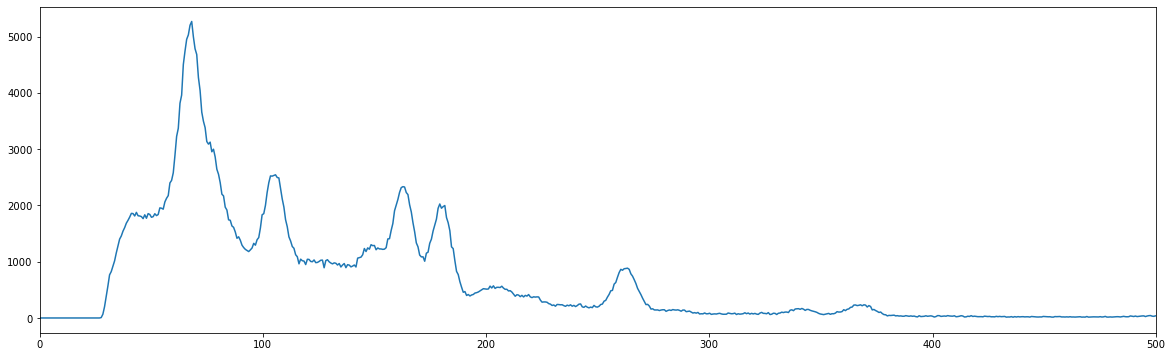

In [191]:
ls_files = os.listdir(path='C:/Users/r0750853/Documents/analysis specta/Spectra-20230105T162014Z-001/Spectra')
os.chdir('C:/Users/r0750853/Documents/analysis specta/Spectra-20230105T162014Z-001/Spectra')

allspectra = []
alltimes = []
for ii, file in enumerate(ls_files):
    if file[-4:len(ls_files)] == '.txt':
        with open(file) as f:
            lines = f.readlines()
        toapp=[]
        for jj in lines:
            toapp.append(int(jj))
        allspectra.append(toapp)
        alltimes.append(file[7:26])
livetime = np.zeros(int(len(ls_files)/2))
ii=-1
for file in (ls_files):
    if file[-4:len(ls_files)] == '.spe':
        ii+=1
        with open(file) as f:
            lines = f.readlines() 
        livetimestr = (lines[8][0:7])
        if livetimestr == '$MEAS_T': #first file contains an extra line with the description
            livetime[ii]= 120.123
        else:
            livetime[ii] = float(livetimestr)

        
x_channels = np.arange(0,4096)
x_energy = 0.751*x_channels-0.99

plt.figure(figsize=(20,6))
plt.plot(x_energy, allspectra[110])
plt.xlim(0,500)

import datetime
import pandas as pd
startmeas = datetime.datetime.strptime(alltimes[1],'%d-%m-%Y_%H-%M-%S')
tijden = []
for ii in range(len(allspectra)):
    datetime_obj = (datetime.datetime.strptime(alltimes[ii],'%d-%m-%Y_%H-%M-%S')-startmeas)
    tijden.append((datetime_obj)/ pd.Timedelta(hours=1))

C:\Users\r0750853\AppData\Local\Temp\ipykernel_4108\3879764555.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (20,5))


155Tb, in MBq
[7.96192489 7.45031588 7.82547149 8.23778626 7.95445599 8.59642426
 7.95541555 7.6514003  8.18123588 7.75679612]
[0.2600171  0.22456945 0.24446919 0.27177334 0.26532013 0.2822836
 0.25327765 0.23763083 0.27268144 0.24042125]
New errors [MBq]
[0.6286632  0.69561736 0.62300479 0.56154693 0.62263557 0.47739711
 0.5968988  0.82738866 0.57284142 0.67774143]
(array([7.96192489, 7.45031588, 7.82547149, 8.23778626, 7.95445599,
       8.59642426, 7.95541555, 7.6514003 , 8.18123588, 7.75679612]), array([0.6286632 , 0.69561736, 0.62300479, 0.56154693, 0.62263557,
       0.47739711, 0.5968988 , 0.82738866, 0.57284142, 0.67774143]))


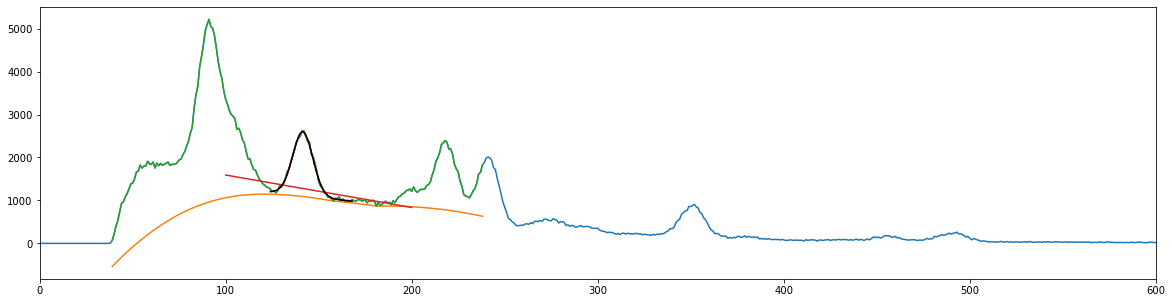

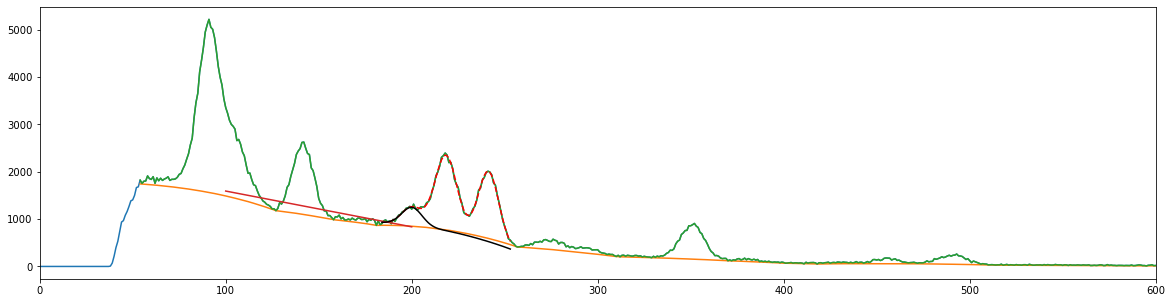

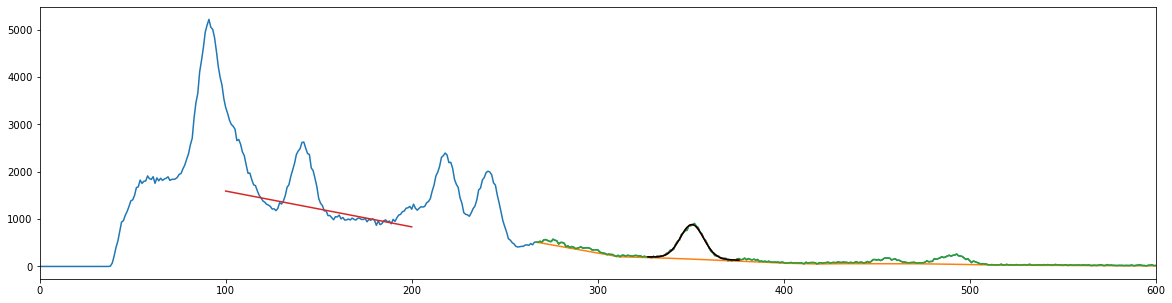

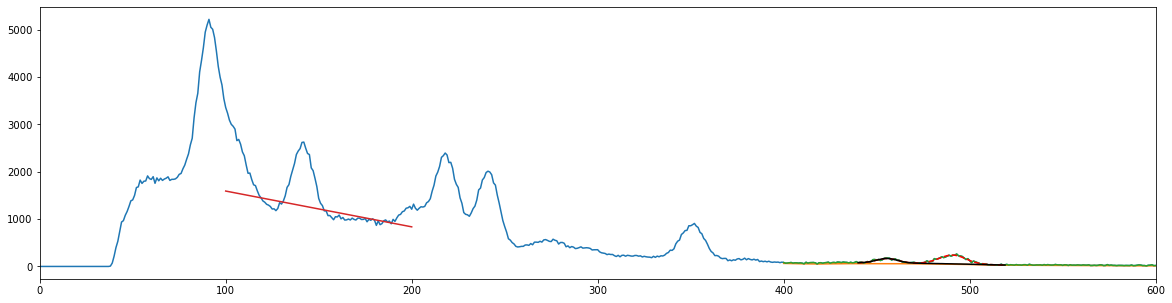

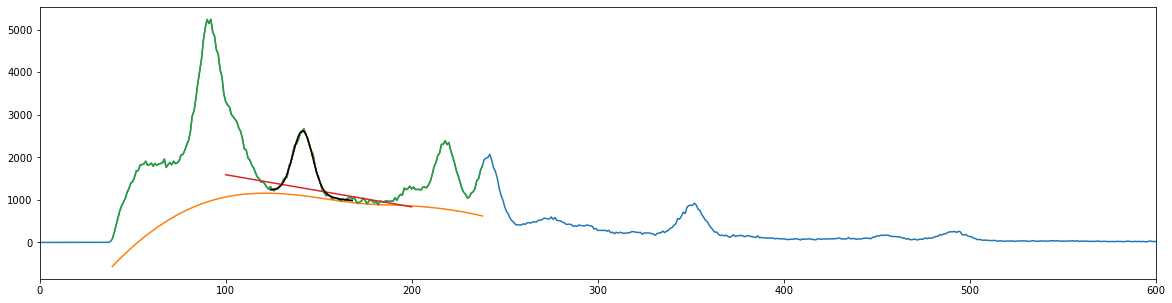

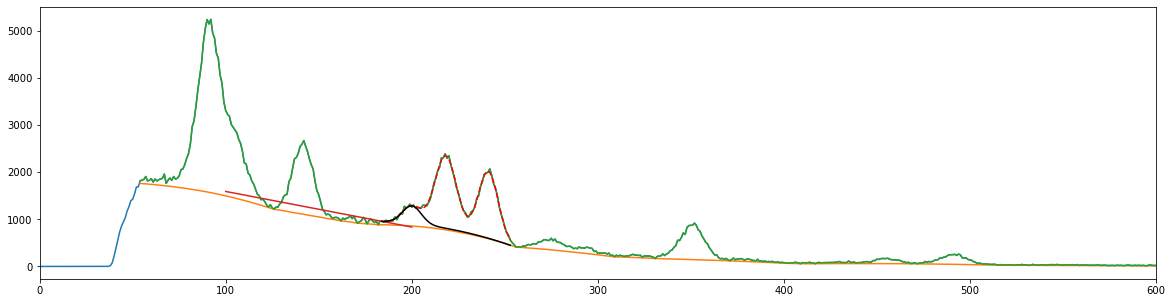

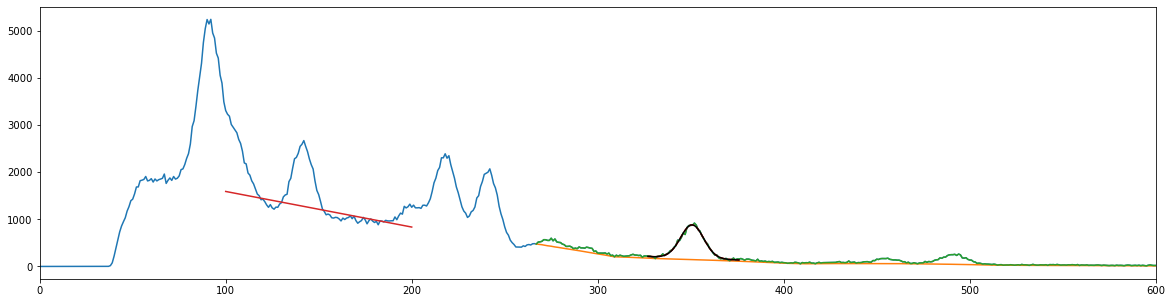

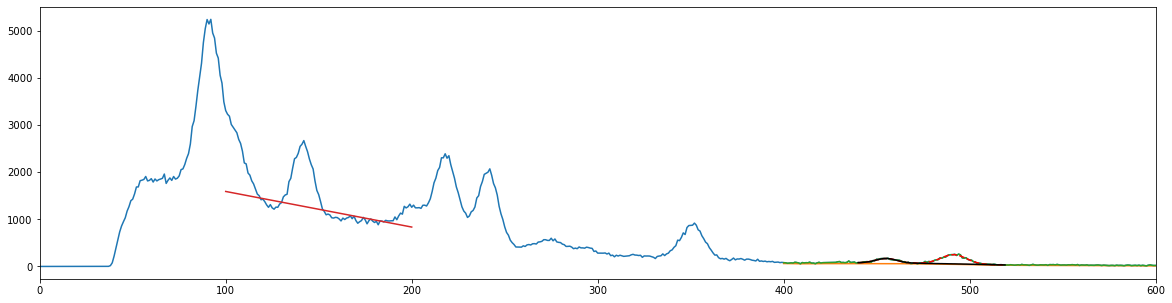

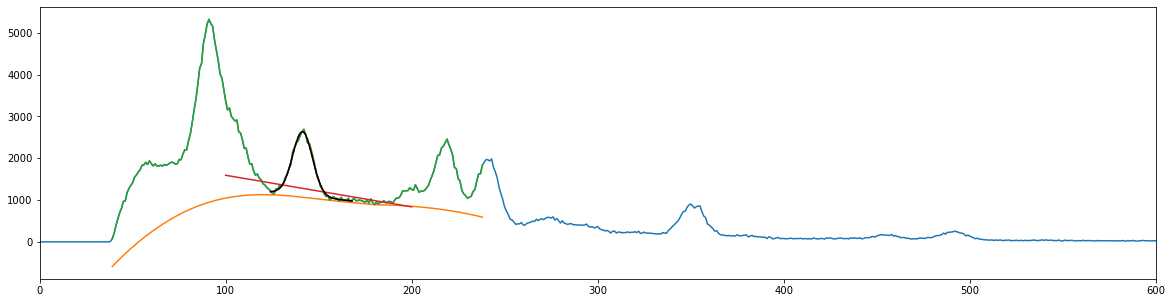

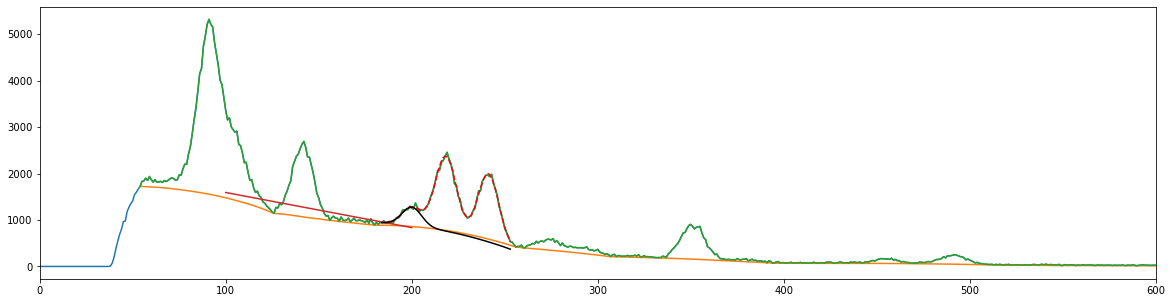

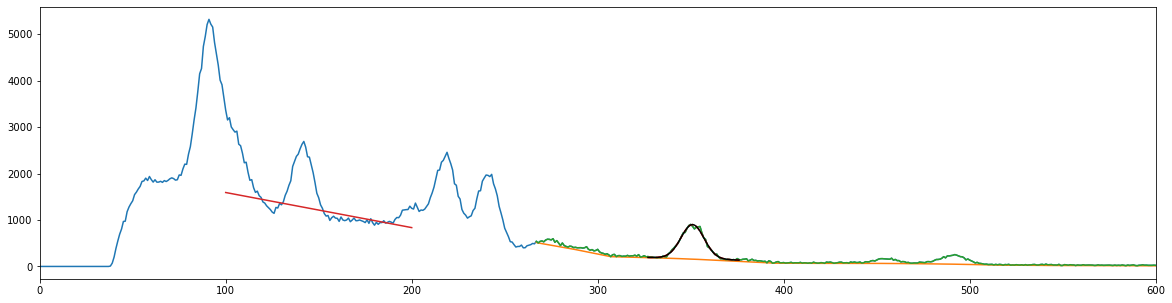

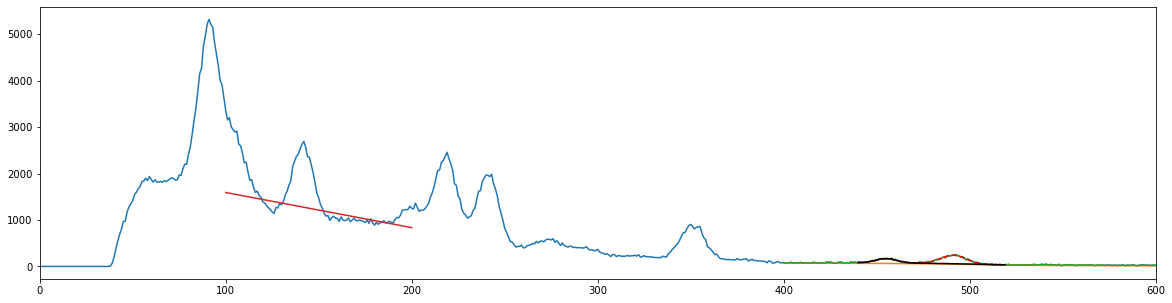

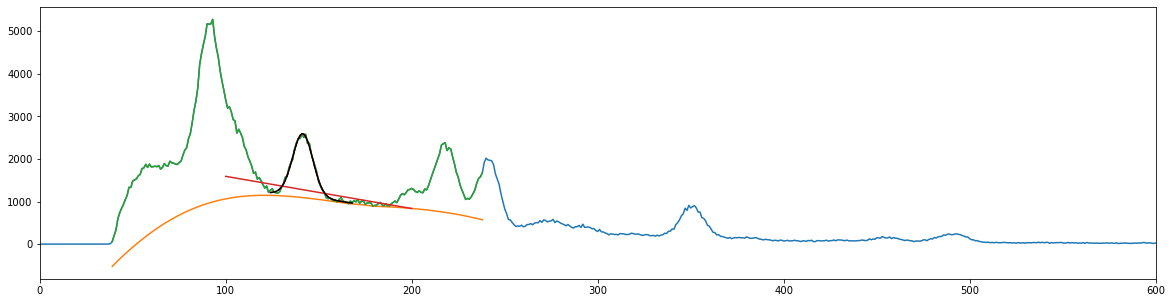

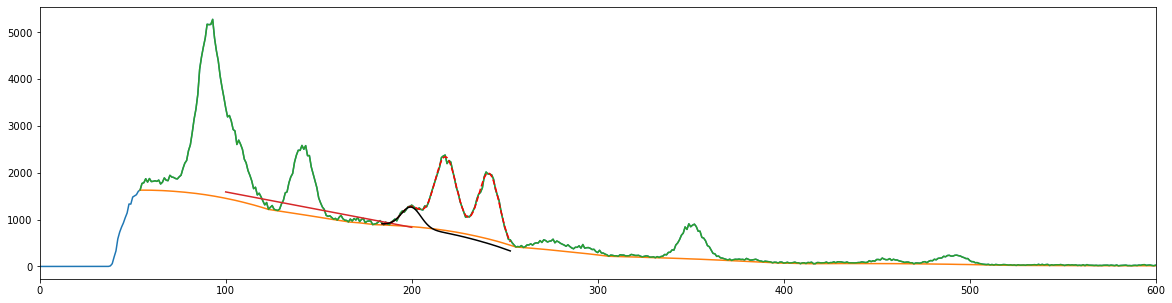

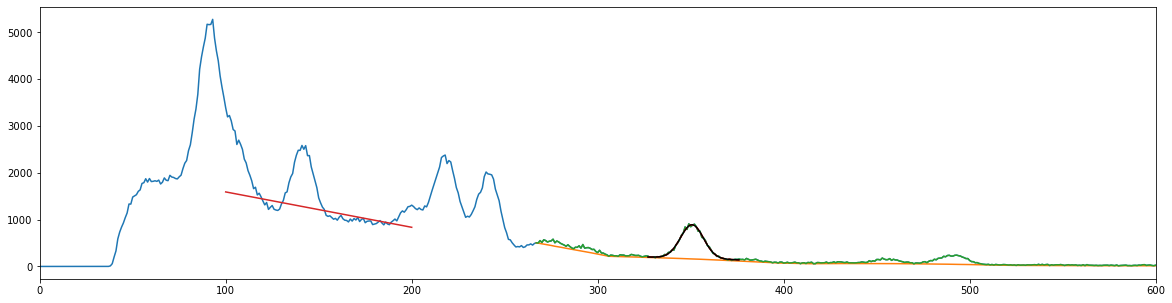

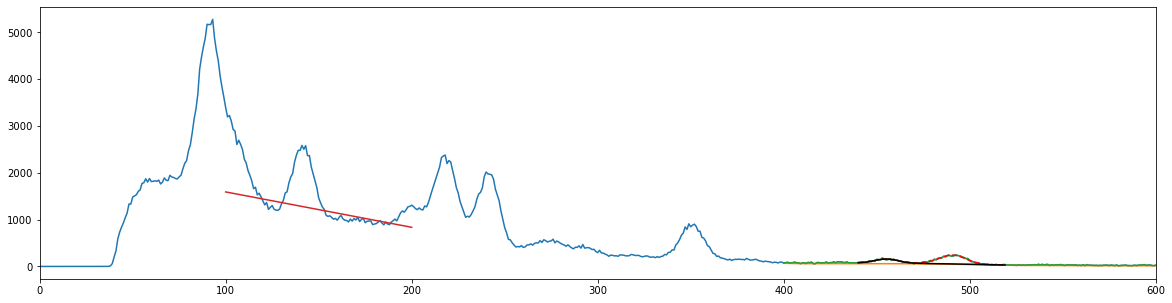

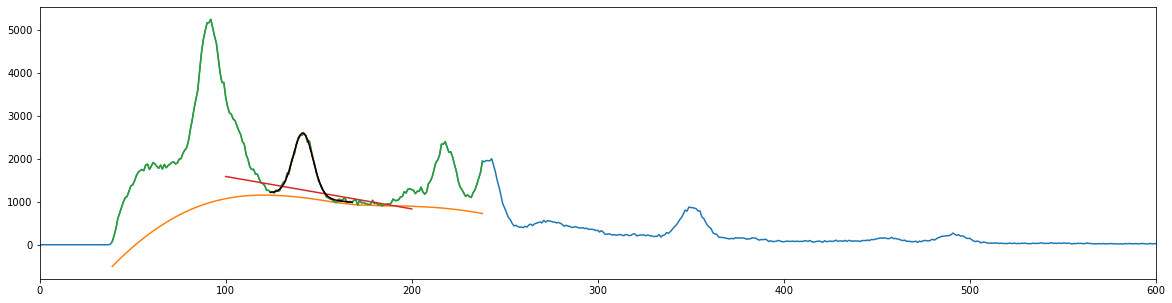

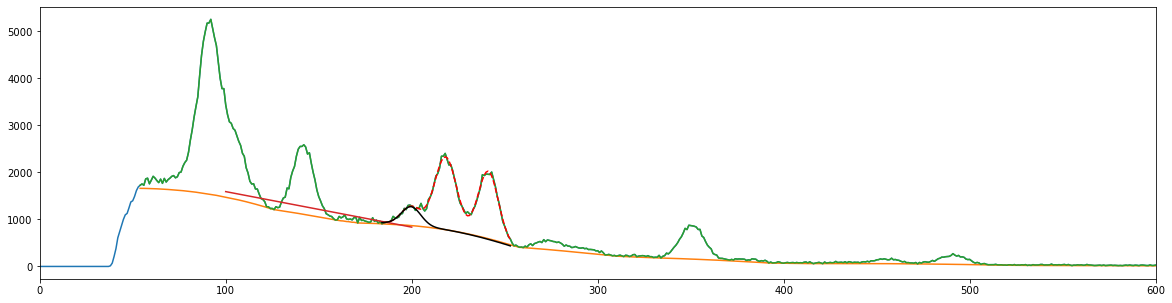

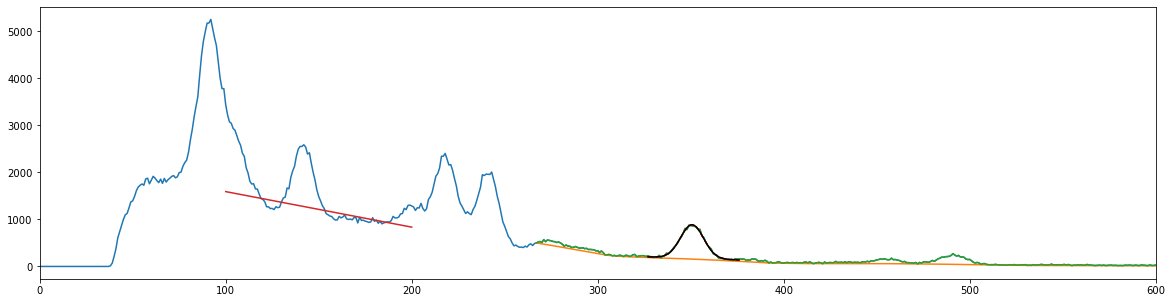

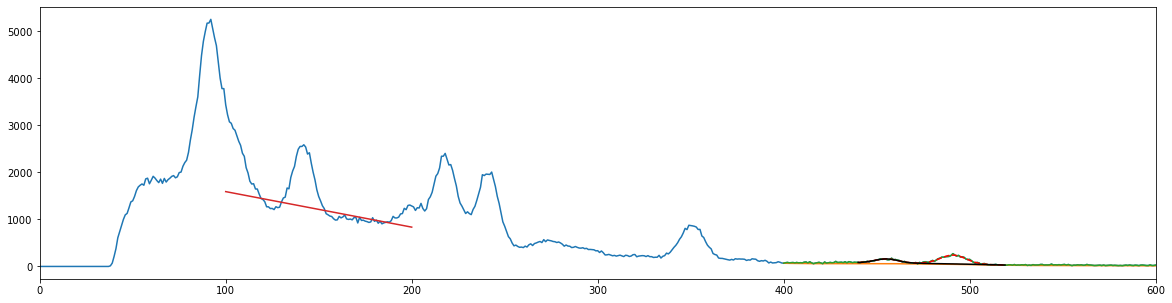

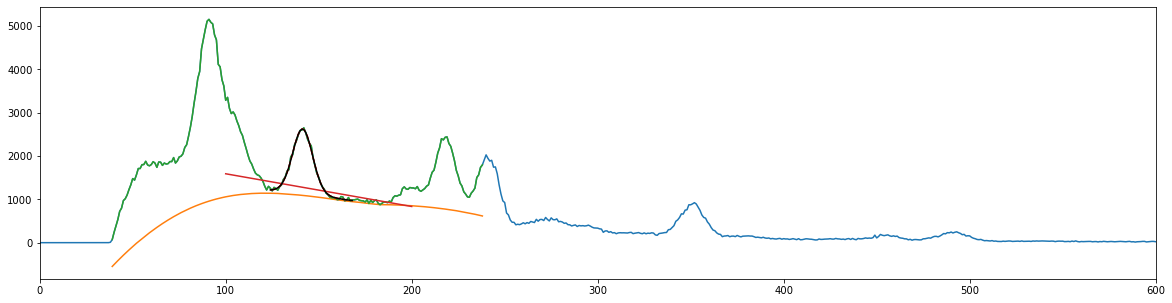

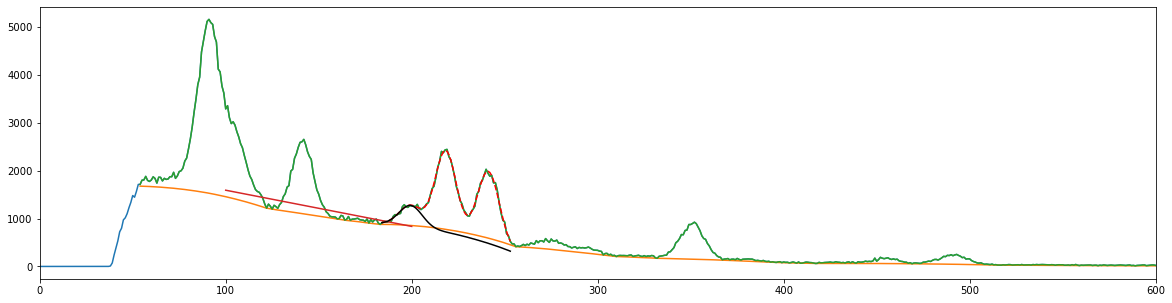

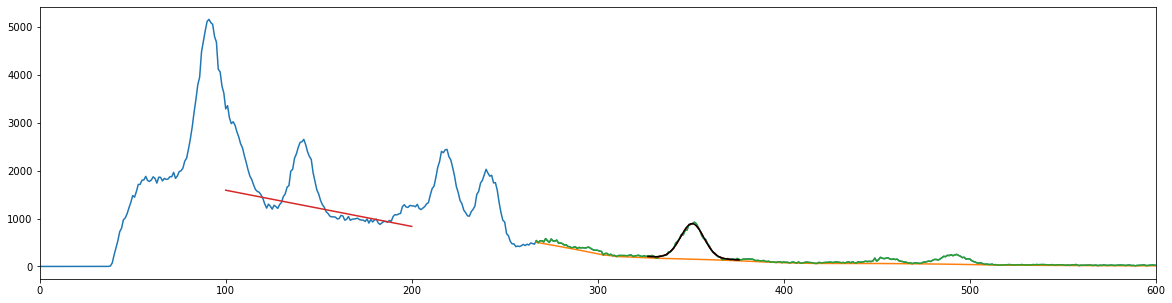

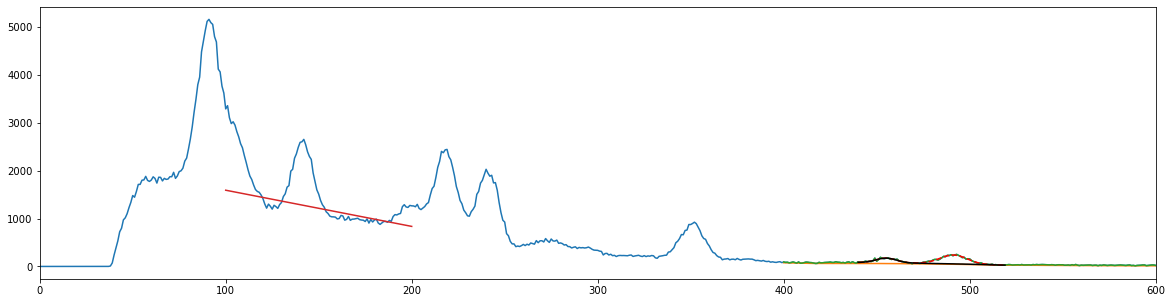

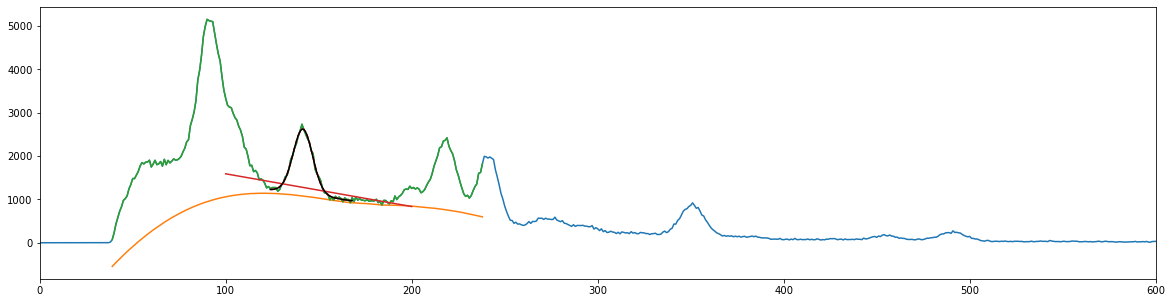

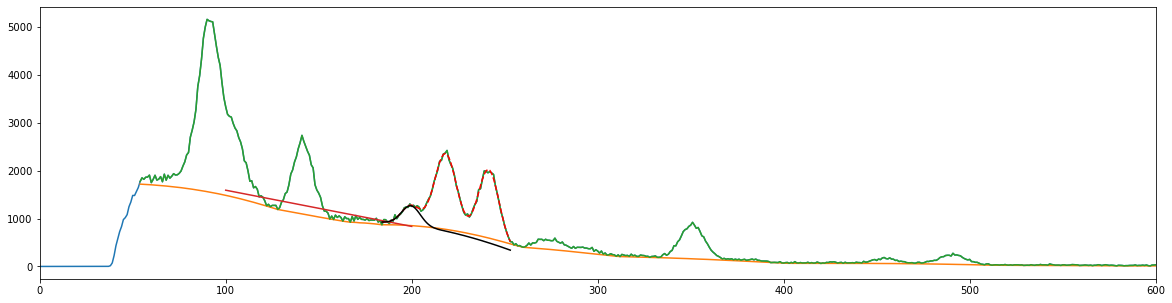

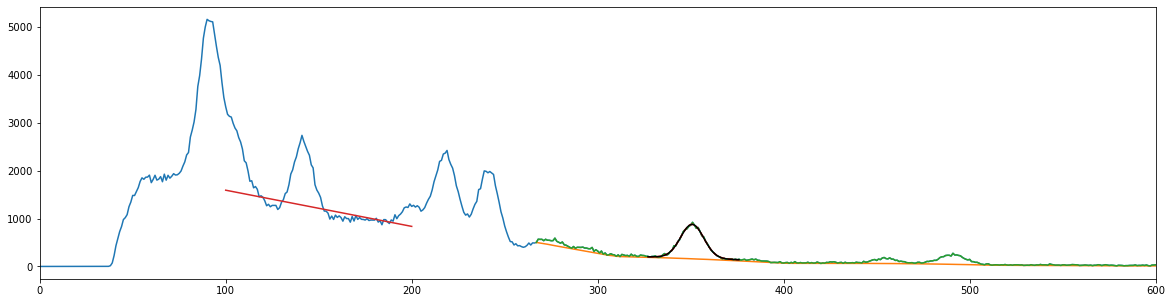

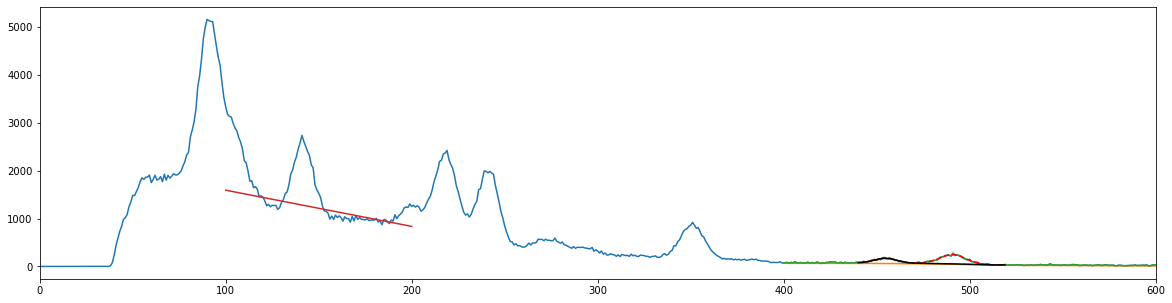

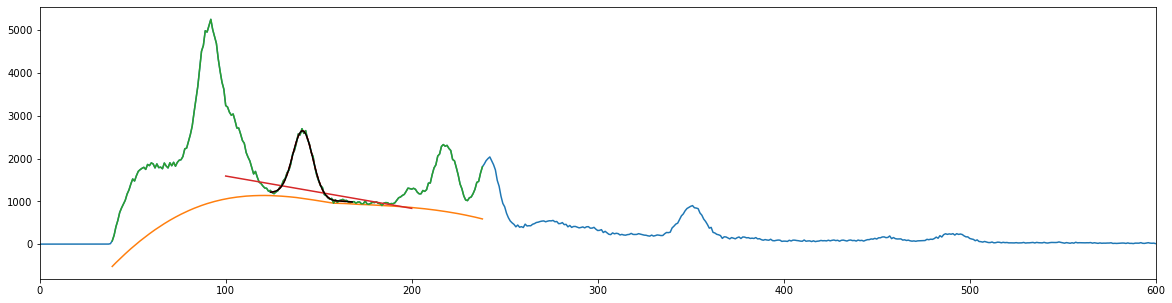

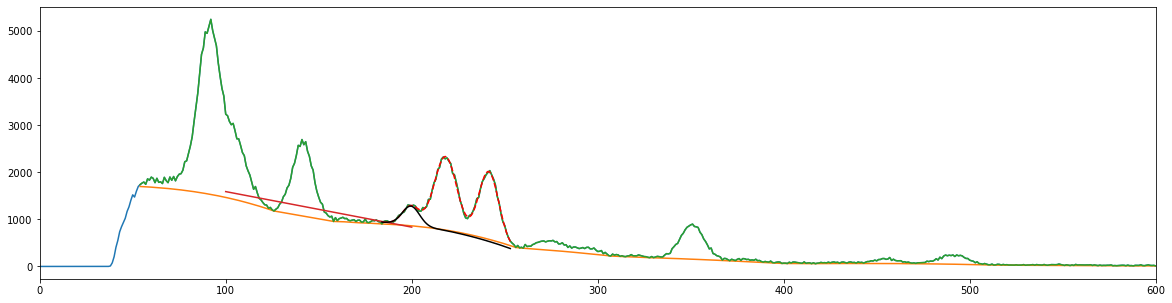

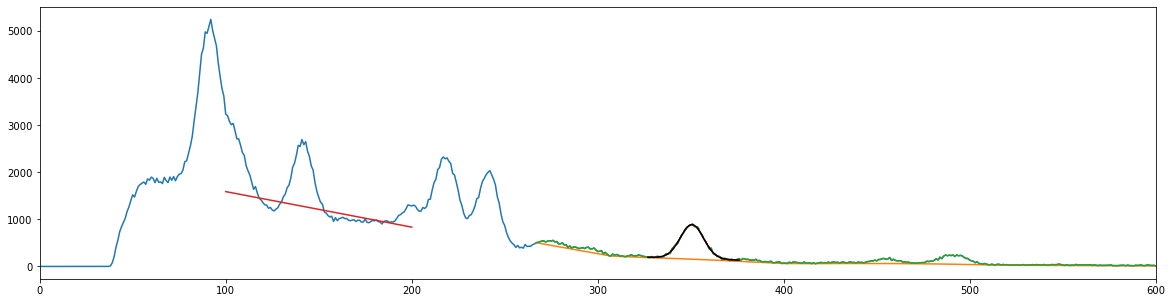

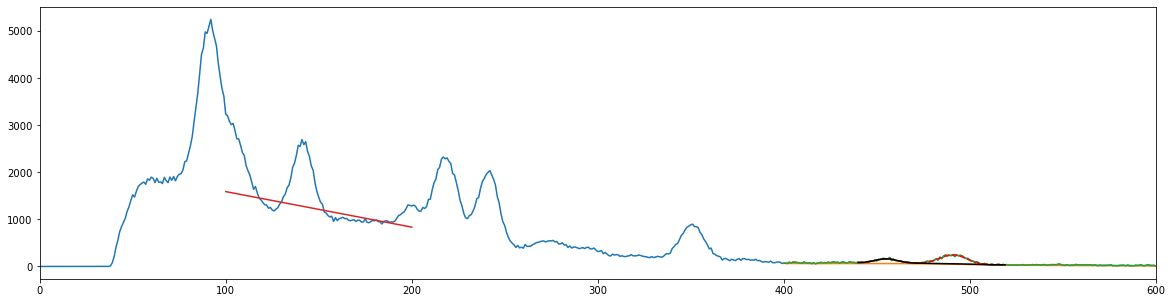

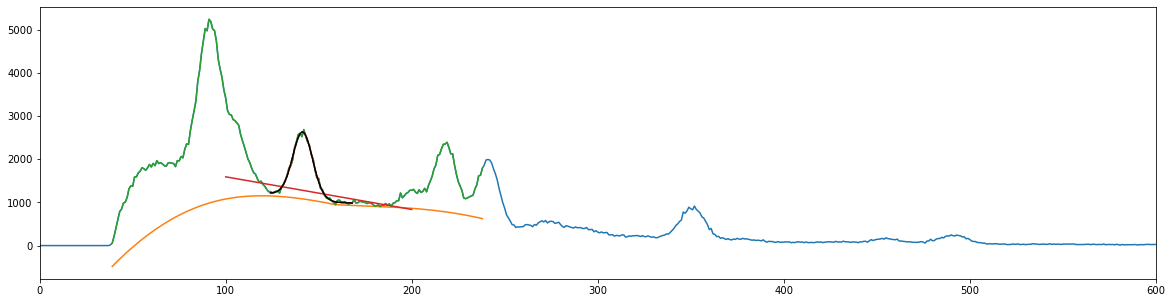

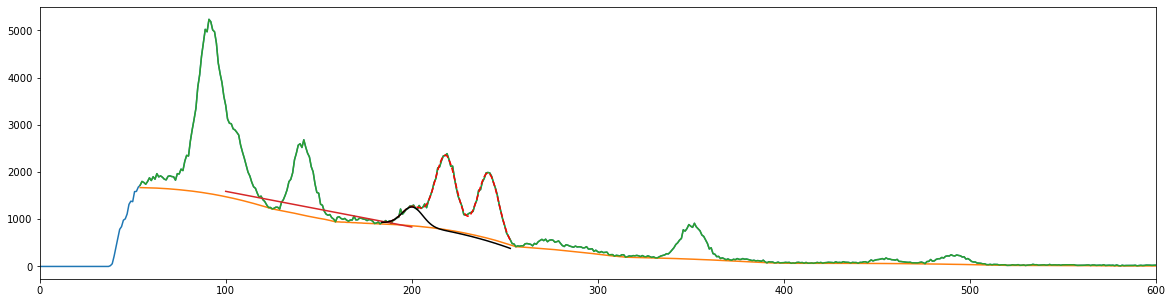

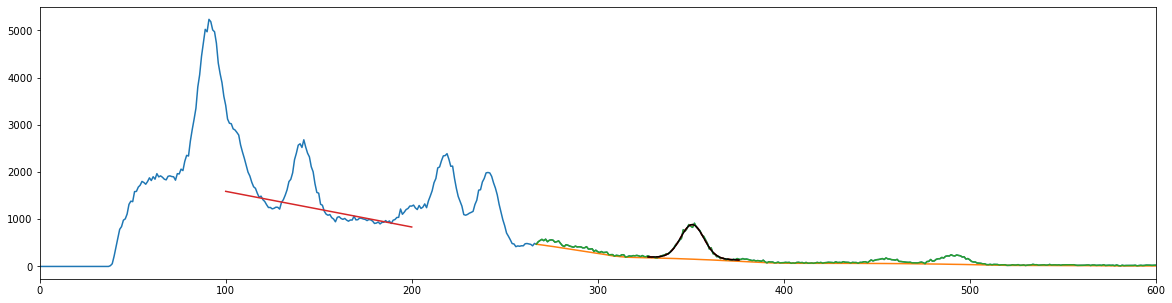

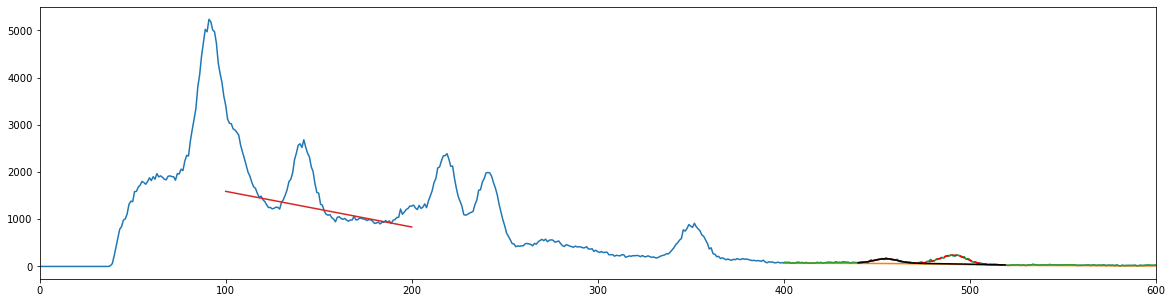

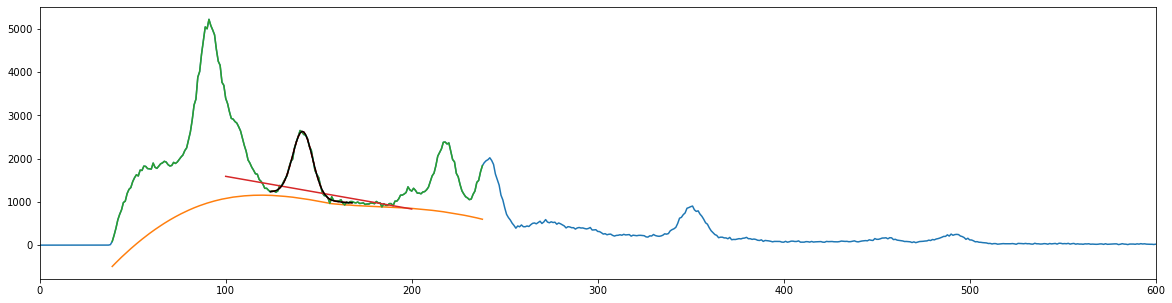

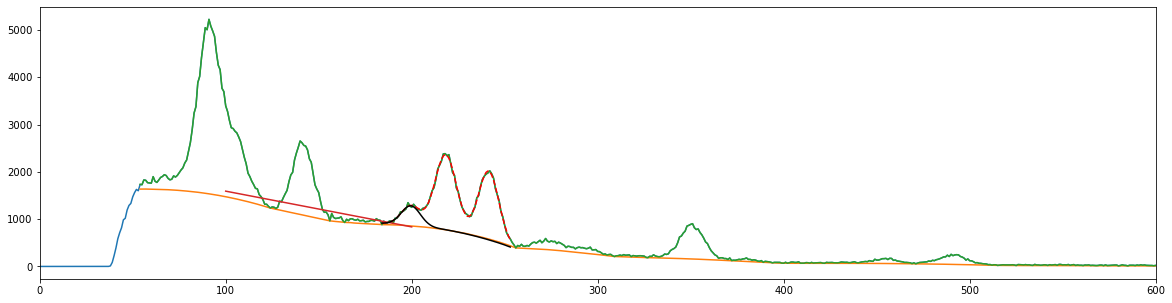

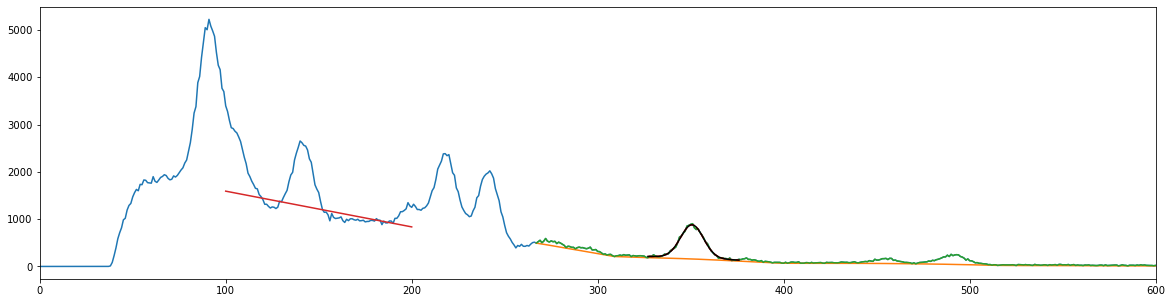

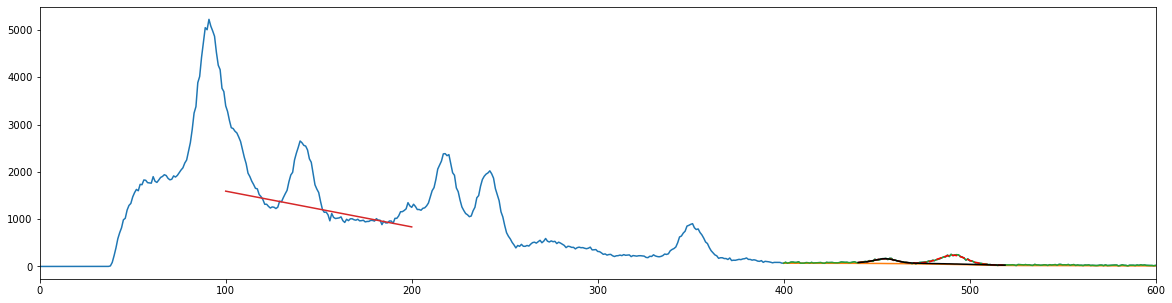

<Figure size 720x720 with 0 Axes>

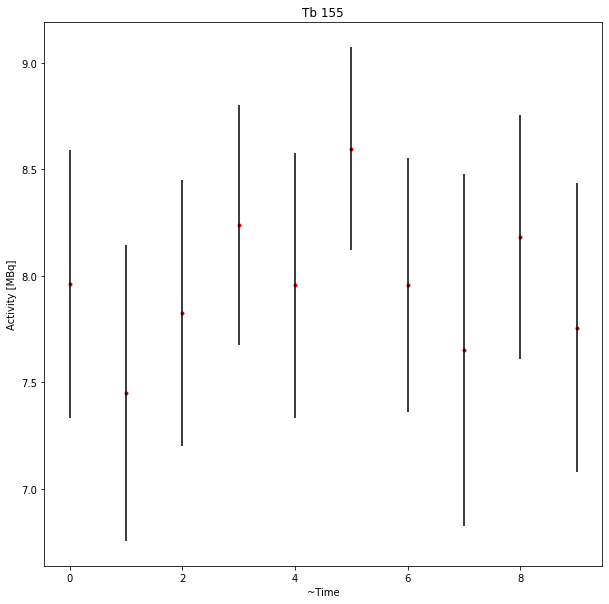

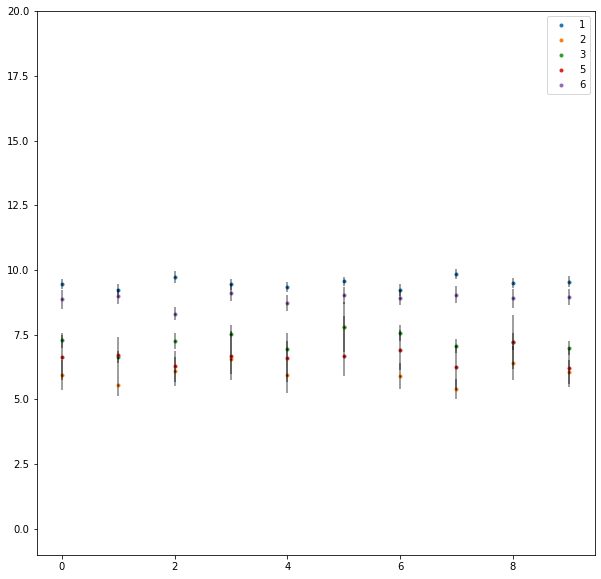

In [56]:
A = calculateactivities(allspectra[100:110], livetime[100:110],printen=True,plot=True)
print(A)

was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 1
was not able to fit - 4
was not able to fit - 4
was not able to fit - 2
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 1
was not able to fit - 1
was not able to fit - 2
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 4
was not able to fit - 4
was not able to fit - 1
was not able to fit - 4
was not able to fit - 4
was not able to fit - 1
was not able to fit - 1
was not able to fit - 3
was not able to fit - 2
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 2
was not able to fit - 3
was not able to 

<Figure size 720x720 with 0 Axes>

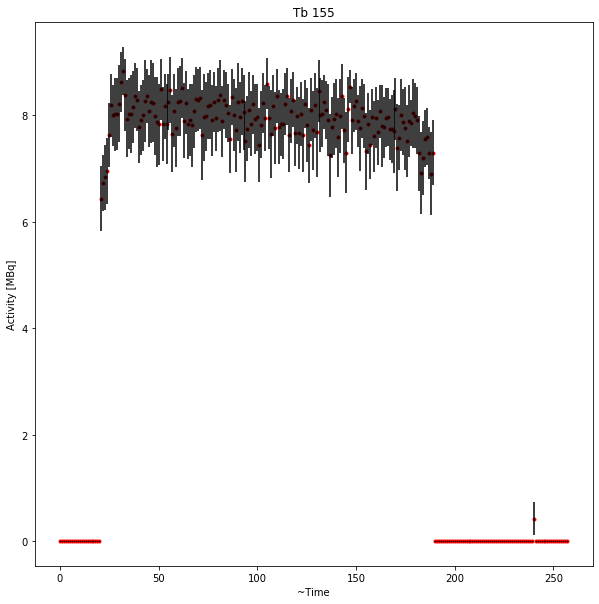

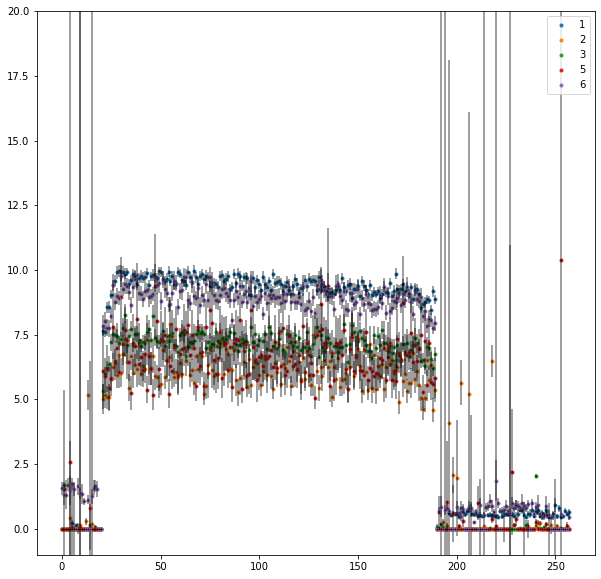

In [57]:
m = calculateactivities(allspectra, livetime,printen=True)

258


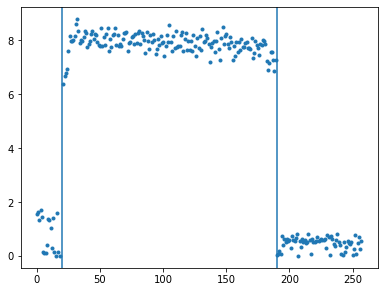

In [341]:
plt.plot(m[0],'.')
plt.axvline(20)
plt.axvline(190)
print(len(m[0]))

0.0
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.04
was not able to fit - 1
was not able to fit - 3
0.08
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
0.12
was not able to fit - 1
was not able to fit - 4
was not able to fit - 4
was not able to fit - 2
was not able to fit - 3
0.16
was not able to fit - 1
was not able to fit - 3
was not able to fit - 1
0.2
was not able to fit - 3
was not able to fit - 1
0.24
was not able to fit - 1
was not able to fit - 2
was not able to fit - 3
0.28
was not able to fit - 3
was not able to fit - 3
was not able to fit - 4
was not able to fit - 4
0.32
was not able to fit - 1
was not able to fit - 4
was not able to fit - 4
was not able to fit - 1
0.36
was not able to fit - 1
was not able to fit - 3
0.4
was not able to fit - 2
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
0.44
was not

<Figure size 720x720 with 0 Axes>

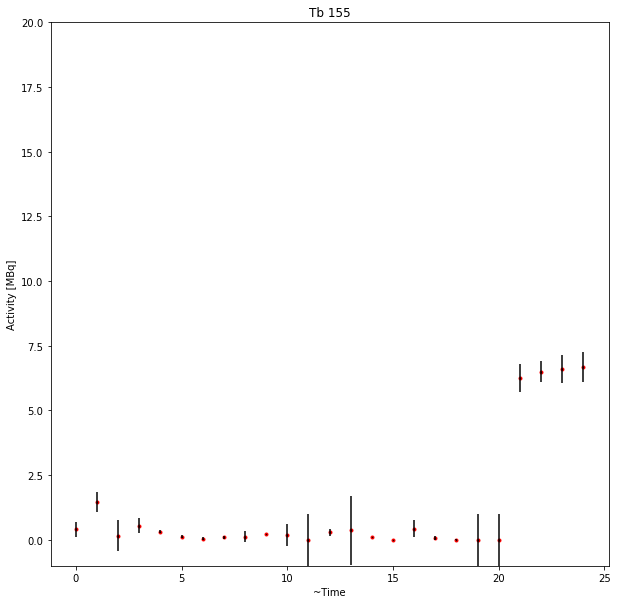

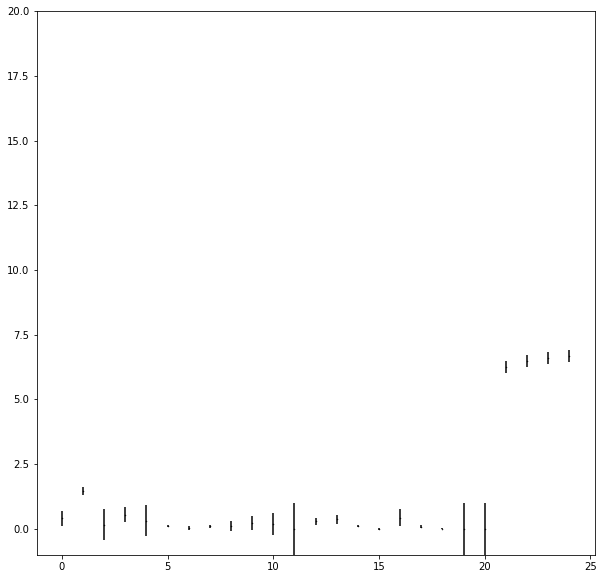

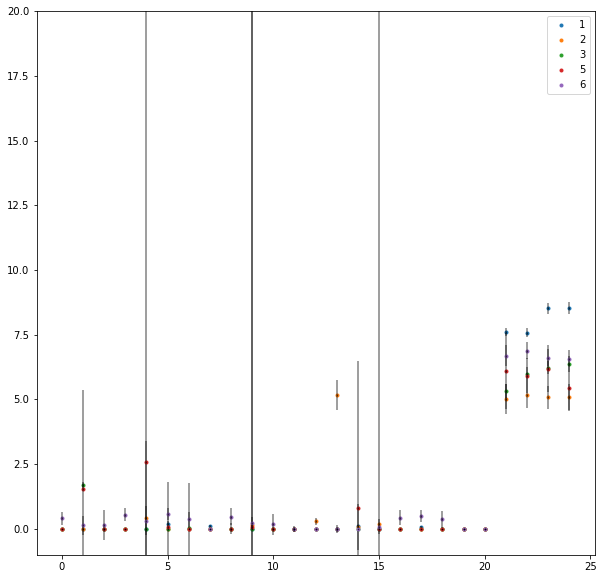

In [112]:
backregio = (np.arange(0,20,1))
b = calculateactivities_backsubtr1_6(allspectra[0:25], livetime[0:25],printen=True, plot=False,backreg=backregio)

In [113]:
backregio = np.concatenate((np.arange(0,20,1),np.arange(190,258,1)))

0.0
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.003875968992248062
was not able to fit - 1
was not able to fit - 3
0.007751937984496124
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
0.011627906976744186
was not able to fit - 1
was not able to fit - 4
was not able to fit - 4
was not able to fit - 2
was not able to fit - 3
0.015503875968992248
was not able to fit - 1
was not able to fit - 3
was not able to fit - 1
0.01937984496124031
was not able to fit - 3
was not able to fit - 1
0.023255813953488372
was not able to fit - 1
was not able to fit - 2
was not able to fit - 3
0.027131782945736434
was not able to fit - 3
was not able to fit - 3
was not able to fit - 4
was not able to fit - 4
0.031007751937984496
was not able to fit - 1
was not able to fit - 4
was not able to fit - 4
was not able to fit - 1
0.03488372093023256
was not able to fit - 1
was not able to f

was not able to fit - 3
was not able to fit - 1
0.8488372093023255
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.8527131782945736
was not able to fit - 4
was not able to fit - 4
0.8565891472868217
was not able to fit - 4
was not able to fit - 4
was not able to fit - 1
was not able to fit - 3
0.8604651162790697
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.8643410852713178
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.8682170542635659
was not able to fit - 3
was not able to fit - 3
0.872093023255814
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.875968992248062
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.8798449612403101
was not able to fit - 3
was not able to fit - 1
0.8837209302325582
was not able to fit - 3
was not able to fit - 3
was not able to fit - 2
0.8875968992248062
was not able to fit - 3
was not able to fit - 3
0

<Figure size 720x720 with 0 Axes>

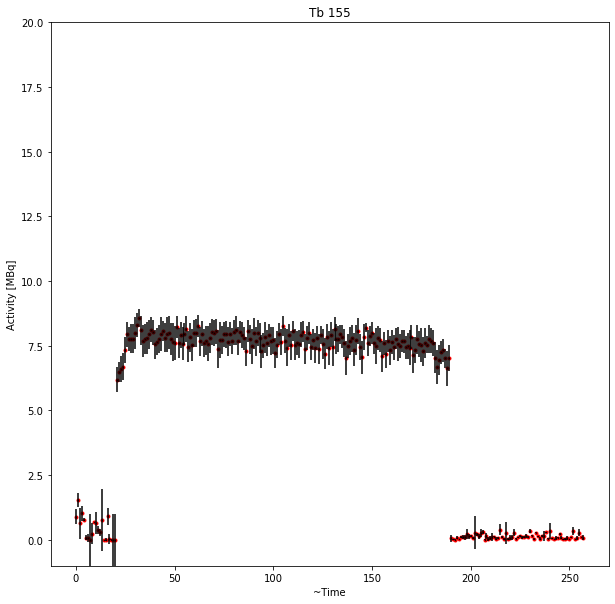

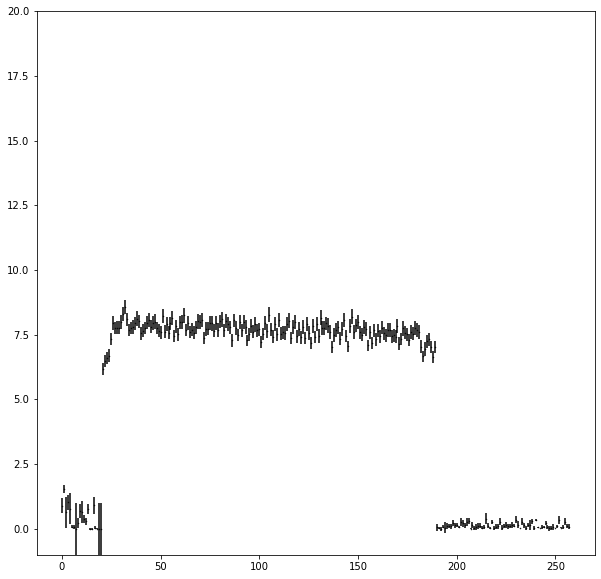

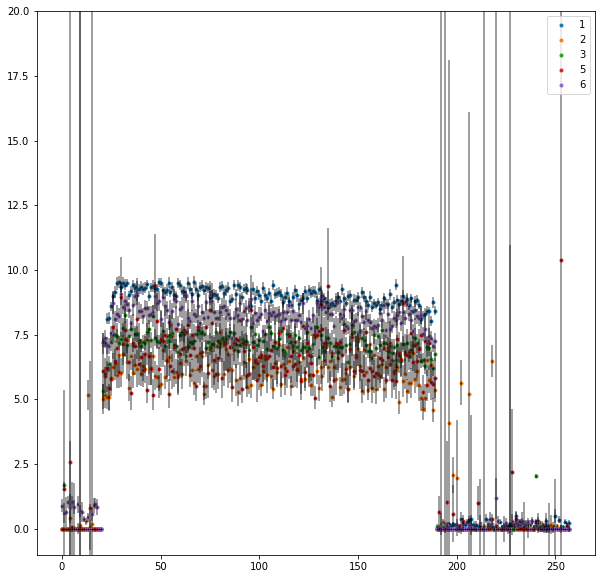

In [114]:
b = calculateactivities_backsubtr1_6(allspectra, livetime,printen=True, plot=False,backreg=backregio)

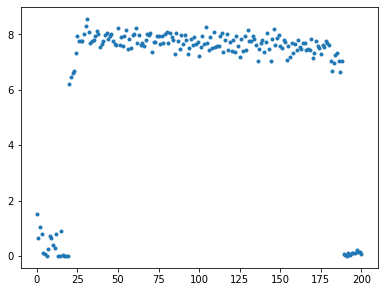

In [134]:
plt.plot(b[0][1:202], '.')

In [194]:
b[0][1:202]
os.chdir('C:/Users/r0750853/Documents/Tb collections')
np.savetxt('Activity_my_calculation.txt',b[0][1:202])
np.savetxt('err_Activity_my_calculation.txt',b[1][1:202])
np.savetxt('Activity_my_calculation_tijden.txt',tijden[1:202])

0.0
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.003875968992248062
was not able to fit - 3
0.007751937984496124
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
0.011627906976744186
was not able to fit - 4
was not able to fit - 4
was not able to fit - 2
was not able to fit - 3
0.015503875968992248
was not able to fit - 3
was not able to fit - 1
0.01937984496124031
was not able to fit - 3
was not able to fit - 1
0.023255813953488372
was not able to fit - 2
was not able to fit - 3
0.027131782945736434
was not able to fit - 3
was not able to fit - 3
was not able to fit - 4
was not able to fit - 4
0.031007751937984496
was not able to fit - 4
was not able to fit - 4
was not able to fit - 1
0.03488372093023256
was not able to fit - 3
0.03875968992248062
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
0.04263565891472868
was not able to fit - 3
was not able to fit - 3
w

was not able to fit - 3
0.8682170542635659
was not able to fit - 3
was not able to fit - 3
0.872093023255814
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.875968992248062
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.8798449612403101
was not able to fit - 3
was not able to fit - 1
0.8837209302325582
was not able to fit - 3
was not able to fit - 3
was not able to fit - 2
0.8875968992248062
was not able to fit - 3
was not able to fit - 3
0.8914728682170543
was not able to fit - 3
was not able to fit - 3
0.8953488372093024
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.8992248062015504
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
0.9031007751937985
was not able to fit - 4
was not able to fit - 4
was not able to fit - 3
0.9069767441860465
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
0.9108527131782945
was not able to fit - 3
was not able to fit - 3
0.9147

<Figure size 720x720 with 0 Axes>

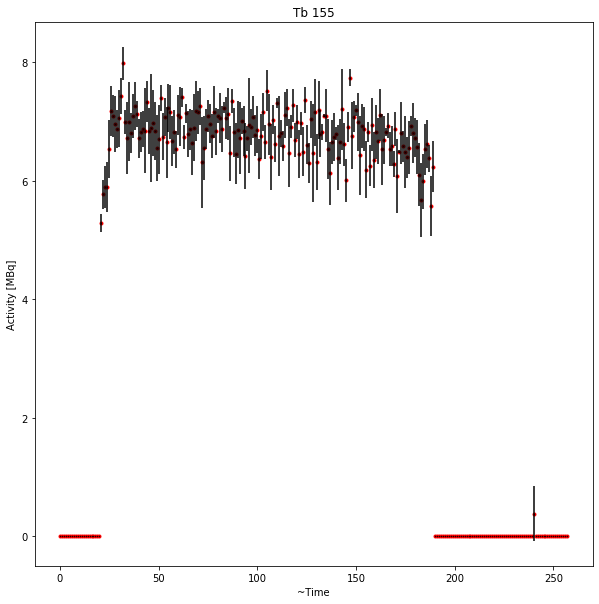

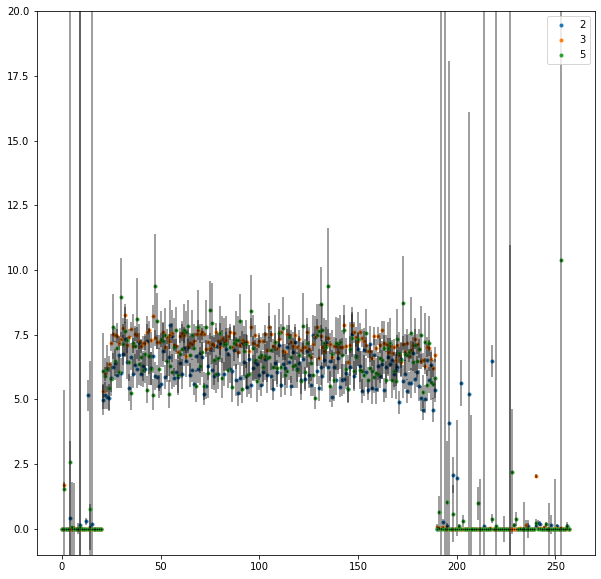

In [248]:
a = calculateactivities_not_1_and_6(allspectra, livetime,printen=True, plot=False)

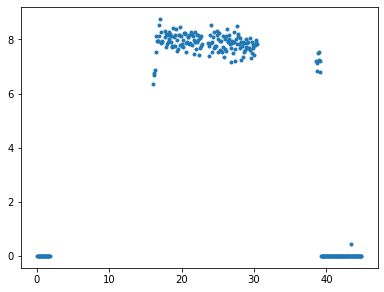

In [157]:
plt.plot(tijden,a[0],'.')

# 15 July

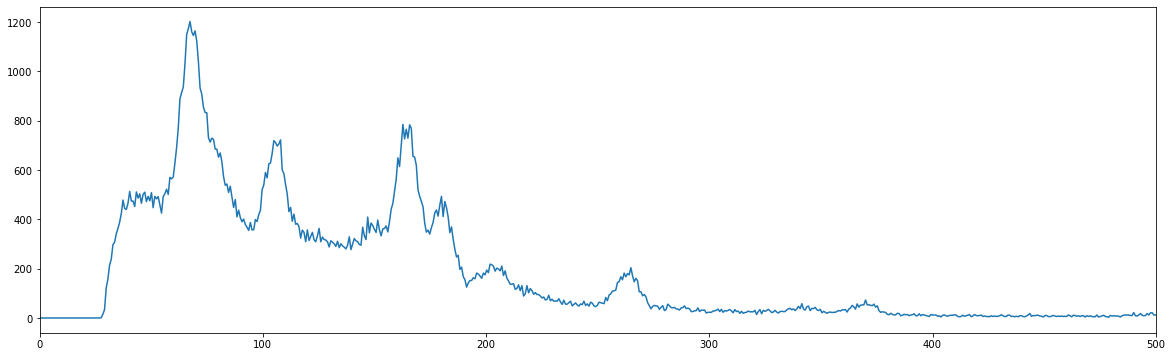

In [4]:
ls_files = os.listdir(path='C:/Users/r0750853/Documents/analysis specta/Spectra-20230109T070005Z-001/Spectra')
os.chdir('C:/Users/r0750853/Documents/analysis specta/Spectra-20230109T070005Z-001/Spectra')

allspectra = []
alltimes = []
for file in ls_files:
    if file[-4:len(ls_files)] == '.txt':
        with open(file) as f:
            lines = f.readlines()
        toapp=[]
        for jj in lines:
            toapp.append(int(jj))
        allspectra.append(toapp)
        alltimes.append(file[6:25])
livetime = np.zeros(int(len(ls_files)/2))
ii=-1
for file in (ls_files):
    if file[-4:len(ls_files)] == '.spe':
        ii+=1
        with open(file) as f:
            lines = f.readlines() 
        livetimestr = (lines[8][0:7])
        if livetimestr == '$MEAS_T': #first file contains an extra line with the description
            livetime[ii]= 120.123
        else:
            livetime[ii] = float(livetimestr)

        
x_channels = np.arange(0,4096)
x_energy = 0.751*x_channels-0.99

plt.figure(figsize=(20,6))
plt.plot(x_energy, allspectra[110])
plt.xlim(0,500)

import datetime
import pandas as pd
startmeas = datetime.datetime.strptime(alltimes[0],'%d-%m-%Y_%H-%M-%S')
tijden = []
for ii in range(len(allspectra)):
    datetime_obj = (datetime.datetime.strptime(alltimes[ii],'%d-%m-%Y_%H-%M-%S')-startmeas)
    tijden.append((datetime_obj)/ pd.Timedelta(hours=1))

was not able to fit - 1
was not able to fit - 3
was not able to fit - 2
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 1
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 4
was not able to fit - 4
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 1
was not able to 

was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
was not able to 

155Tb, in MBq
[2.04622192e-01 7.33663888e-02 2.90715313e-01 1.35529225e-01
 3.89325868e-07 7.70410669e-01 2.32371201e-02 2.14149770e-02
 3.01167760e-01 2.64989364e-01 5.94471623e-02 3.90979169e-02
 1.84013739e-01 2.83544775e-01 7.05884203e-02 1.13153366e-01
 1.61860624e-01 3.21630404e-01 3.13311438e-01 2.85712328e-02
 3.51740388e-01 3.40727610e-01 2.35555133e-01 1.86693510e-01
 2.52475056e-01 4.72643880e-02            nan            nan
 2.49341997e-01 4.07411094e-01 3.36767335e-01 1.44641794e-01
 8.53310935e-02 1.52966911e-01 1.12965619e-01 1.52644398e-02
            nan 1.58492475e-01 9.24491371e-02 3.26113504e-01
 9.11518970e-03 1.47356704e-02 1.48371836e-01 8.62317742e-02
 2.31498718e-02 4.90666112e-01 5.88643014e-01 1.91956156e-01
 2.91090510e-01 8.51184981e-01 2.20978241e-01 5.08846988e-01
 6.89440082e-01 3.77162515e-01 6.63557953e-01 1.05592637e+00
 9.21437528e-01 6.41640021e-01 1.05625860e+00 7.21300140e-01
 8.96969038e-01 1.09710680e+00 1.26117947e+00 1.08603010e+00
 1.0443298

<Figure size 720x720 with 0 Axes>

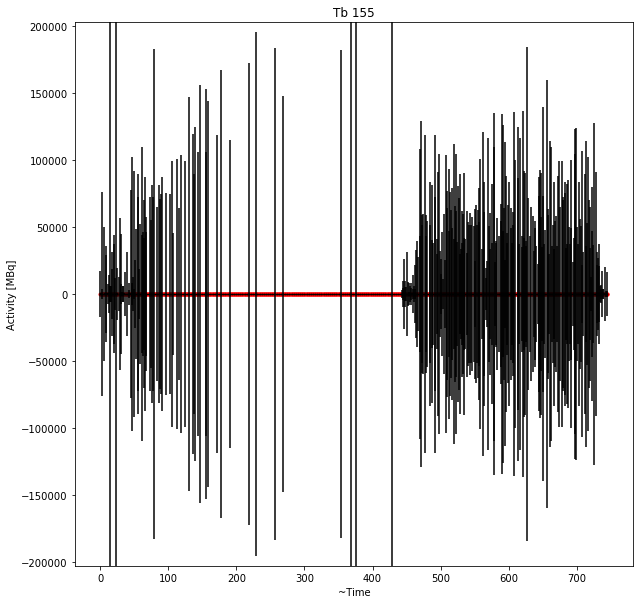

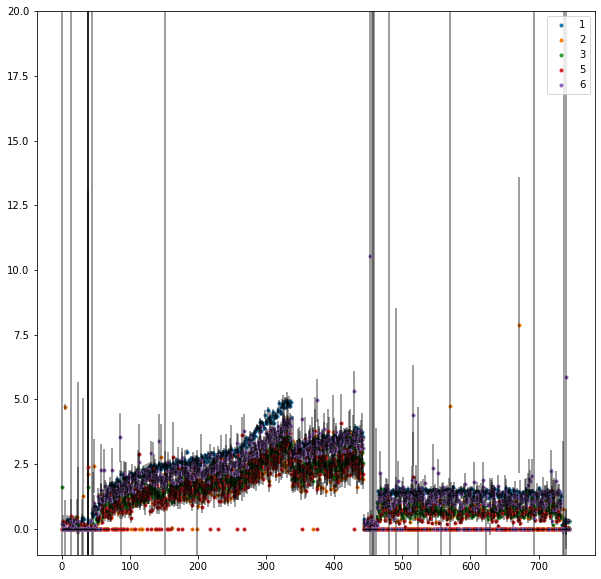

In [360]:
a = calculateactivities(allspectra, livetime,printen=True, plot=False)

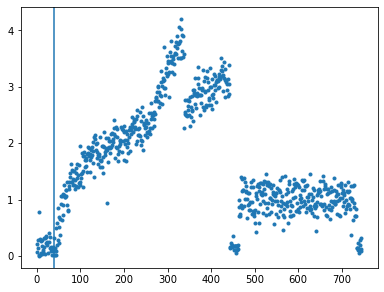

In [363]:
plt.plot(a[0],'.')
plt.axvline(40)

0.0
was not able to fit - 1
was not able to fit - 3
was not able to fit - 2
was not able to fit - 3
0.0013404825737265416
was not able to fit - 3
0.002680965147453083
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.004021447721179625
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
0.005361930294906166
was not able to fit - 1
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
0.006702412868632708
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.00804289544235925
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
0.00938337801608579
was not able to fit - 3
was not able to fit - 3
was not able to fit - 3
0.010723860589812333
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
was not able to fit - 3
was not able to fit - 3
0.012064343163538873
was not able to fit - 3
was not able to fit - 3
was not able to 

was not able to fit - 3
0.1836461126005362
0.18498659517426275
was not able to fit - 3
0.1863270777479893
was not able to fit - 3
0.1876675603217158
0.18900804289544235
0.1903485254691689
0.19168900804289543
was not able to fit - 3
0.19302949061662197
0.19436997319034852
0.19571045576407506
was not able to fit - 3
0.1970509383378016
0.19839142091152814
0.19973190348525469
0.20107238605898123
0.20241286863270777
0.2037533512064343
0.20509383378016086
0.2064343163538874
0.20777479892761394
was not able to fit - 3
0.20911528150134048
was not able to fit - 3
0.21045576407506703
0.21179624664879357
0.2131367292225201
was not able to fit - 3
0.21447721179624665
0.2158176943699732
0.21715817694369974
0.21849865951742628
0.21983914209115282
0.22117962466487937
0.2225201072386059
0.22386058981233245
0.225201072386059
0.22654155495978553
0.22788203753351208
0.2292225201072386
was not able to fit - 3
0.23056300268096513
0.23190348525469168
0.23324396782841822
0.23458445040214476
0.235924932975871

was not able to fit - 2
was not able to fit - 3
0.6193029490616622
was not able to fit - 3
was not able to fit - 3
was not able to fit - 1
0.6206434316353887
was not able to fit - 3
0.6219839142091153
was not able to fit - 3
0.6233243967828418
was not able to fit - 3
0.6246648793565683
0.6260053619302949
was not able to fit - 3
0.6273458445040214
0.628686327077748
was not able to fit - 3
was not able to fit - 3
0.6300268096514745
was not able to fit - 4
was not able to fit - 4
0.631367292225201
was not able to fit - 3
was not able to fit - 4
was not able to fit - 4
0.6327077747989276
was not able to fit - 3
0.6340482573726541
was not able to fit - 3
0.6353887399463807
was not able to fit - 3
0.6367292225201072
0.6380697050938338
0.6394101876675603
was not able to fit - 3
was not able to fit - 3
0.6407506702412868
was not able to fit - 3
0.6420911528150134
was not able to fit - 3
0.6434316353887399
was not able to fit - 3
0.6447721179624665
0.646112600536193
0.6474530831099196
0.6487935

was not able to fit - 3
0.853887399463807
was not able to fit - 3
was not able to fit - 3
0.8552278820375335
was not able to fit - 3
was not able to fit - 3
0.8565683646112601
was not able to fit - 4
was not able to fit - 4
0.8579088471849866
was not able to fit - 3
0.8592493297587132
0.8605898123324397
0.8619302949061662
was not able to fit - 3
0.8632707774798928
was not able to fit - 3
was not able to fit - 3
0.8646112600536193
was not able to fit - 4
was not able to fit - 4
0.8659517426273459
was not able to fit - 4
was not able to fit - 4
was not able to fit - 3
0.8672922252010724
was not able to fit - 3
was not able to fit - 3
0.868632707774799
was not able to fit - 3
0.8699731903485255
was not able to fit - 3
0.871313672922252
was not able to fit - 3
was not able to fit - 3
0.8726541554959786
was not able to fit - 4
was not able to fit - 4
was not able to fit - 3
0.8739946380697051
was not able to fit - 3
0.8753351206434317
was not able to fit - 3
0.8766756032171582
0.87801608579

<Figure size 720x720 with 0 Axes>

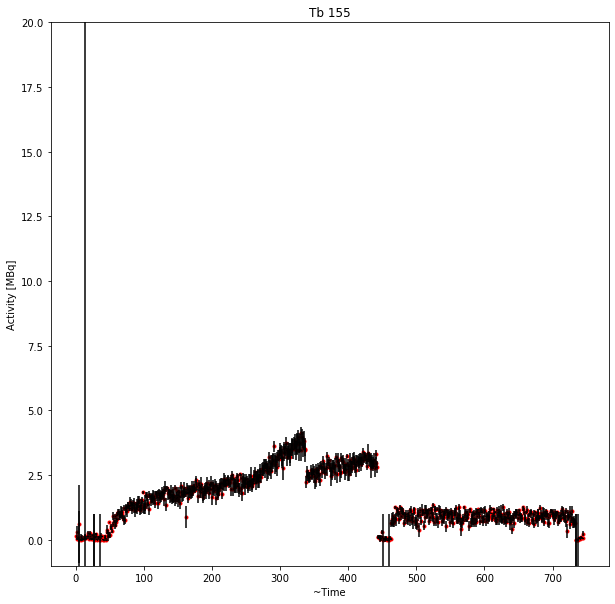

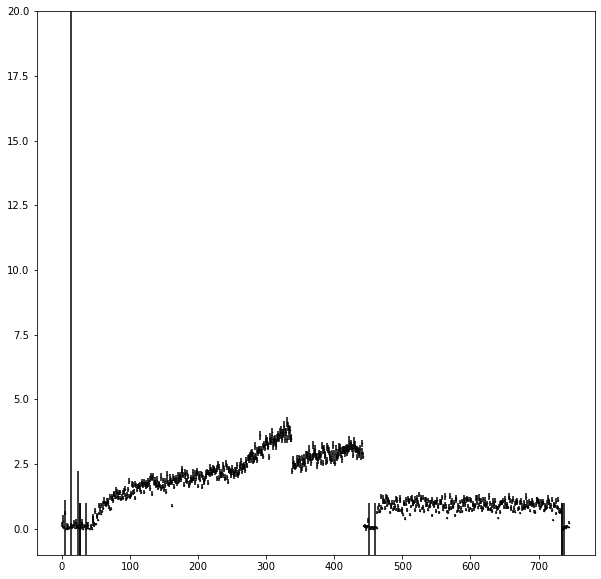

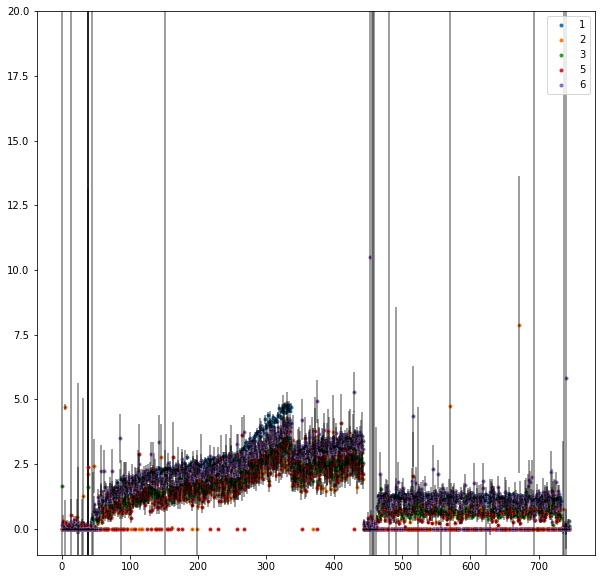

In [117]:
b2 = calculateactivities_backsubtr1_6(allspectra, livetime,printen=True, plot=False,backreg=np.arange(0,40,1))

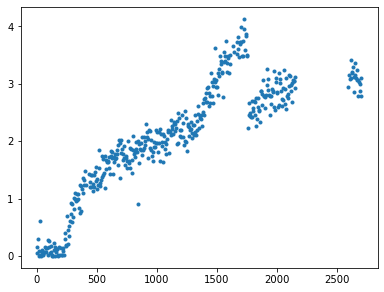

In [206]:
plt.plot(np.array(tijden[0:440])*60, b2[0][0:440],'.')

In [196]:
b2[0][1:202]
os.chdir('C:/Users/r0750853/Documents/Tb collections')
np.savetxt('Activity_my_calculation_15jul.txt',b2[0][0:440])
np.savetxt('err_Activity_my_calculation_15jul.txt',b2[1][0:440])
np.savetxt('tijden_err_Activity_my_calculation_15jul.txt',tijden[0:440])